# <center><b> Pratical  1 - Manipulation of femtosecond pulses </b></center>

This tutorial and code has been mainly written by Sebastien Weber, Baptiste Fabre and Yann Mairesse in the frame of the FemtoUp school.

## 1. Presentation of useful functions

In this first part, useful functions for the manipulation of electric filed both in the time and frequency domains will be presented. For future applications, all these functions, and the ones that will be presented in the next sections, will be all gathered in the same file, which will constitute our own library <code>FemtoUpLib.py</code>. 

You'll be able to use this library for future work, by importing it in your code in the first lines as : <code>from FemtoUpLib import *</code>.

Let's import the classical libraries <code>numpy</code> and <code>matplotlib.pyplot</code>. In general, <code>numpy</code> should be imported using an alias (for example <code>np</code>), but in order to lighten the writing and make it easier for beginners, we will omit this alias. This means that for instance to use the exponential function, we will type exp() instead of np.exp(). This is ok because we do not import many libraries. This could be a problem if one function was defined in two libraries. 



In [50]:
#%matplotlib
from numpy import *
from matplotlib.pyplot import *

#Control size of figures
rcParams['figure.figsize'] = [12, 8]

### 1.1 Moving from one domain to the other

When dealing with <b>Fourier Transform</b>, one should be able to move from time domain to frequency domain, and vice versa. To do so, we first define two functions :
* <code>time2freq(t,Nbw)</code> which takes as an argument an array of times and returns an array of <code>Nbw</code> angular frequencies $\omega$ (rad.s$^{-1}$).
* <code>freq2time(w,Nbt)</code> which takes as an argument an array of angular frequencies and returns an array of <code>Nbt</code> times $t$ (s).

One remark, even if it is absolutely not mandatory, we will work in general with <b>symmetrical</b> frequency and time domain (same number of points, and zero time and zero frequency at the center of the window). This makes switching back and forth between the two domains easier.

#### From time domain to angular frequency one

The following equations are used to go from times (with <code>Nbt</code> points) to angular frequencies (with <code>Nbw</code> points):

\begin{align}
\delta t &= t[1]-t[0] \\
\Delta t &= Nbw \times \delta t \\
\delta \omega &= \frac{2 \pi}{\Delta t} \\
\Delta \omega &= \delta \omega \times Nbw
\end{align}

Finally, the array of angular frequencies is given by $\omega =[-\frac{\Delta \omega}{2}:\frac{\Delta \omega}{2}]$ with <code>Nbw</code> points. 

Time domain is defined from example from $-500$ fs to $500$ fs with <code>Nbt=4096</code> points (FFT computation is optimized for array of size $2^n$)  :

In [51]:
Nbt = 4096
t=linspace(-500e-15,500e-15,Nbt)

In [52]:
def time2freq(t,Nbw):
    """
    Parameters
    ----------
    t : array of floats
        time
    Nbw : integer
        Nunmber of points to be used. Nbw must be greater that Nbt=len(t) for ZERO-PADDING
    
    Returns
    -------
    w : angular frequency

    """
    # temporal sampling rate
    delta_t=t[1]-t[0] 
    # total temporal range
    Delta_t=(Nbw)*delta_t 
    # spectral sampling rate
    delta_w=2*pi/Delta_t 
    # total spectral range
    Delta_w=delta_w*Nbw 
    # Angular frequency
    w=linspace(-Delta_w/2,Delta_w/2,Nbw)
    return w

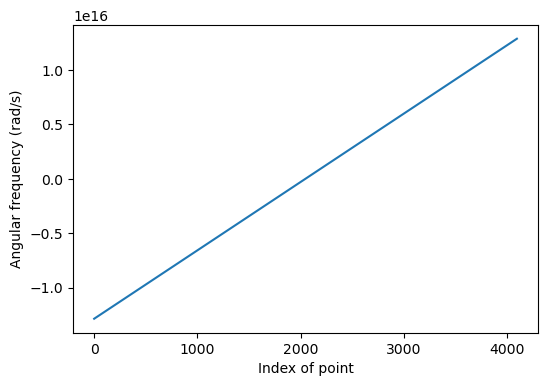

In [53]:
Nbw=4096
w=time2freq(t,Nbw)
fig = figure(figsize = (6,4))
plot(w)
xlabel('Index of point')
ylabel('Angular frequency (rad/s)')
show()

***
#### From angular frequency domain to time one

The following equations are used to go from angular frequencies (with <code>Nbw</code> points) to times (with <code>Nbt</code> points):

\begin{align}
\delta \omega &= \omega[1]-\omega[0] \\
\Delta \omega &= Nbt \times \delta \omega \\
\delta t &= \frac{2 \pi}{\Delta \omega} \\
\Delta t &= \delta t \times Nbt
\end{align}

Finally, the array of times is given by $\omega =[-\frac{\Delta t}{2}:\frac{\Delta t}{2}]$ with <code>Nbt</code> points. 

In [54]:
def freq2time(w,Nbt):
    """
    Parameters
    ----------
    w : array of floats
        angular frequency (must contains 0 frequency)
    Nbt : integer
        Nunmber of points to be used. Nbt must be greater that Nbw=len(w) for ZERO-PADDING
    
    Returns
    -------
    t : array of time (s)

    """
    # spectral sampling rate
    delta_w=w[1]-w[0] 
    # total spectral range
    Delta_w=Nbt*delta_w
    # temporal sampling rate
    delta_t=2.*pi/Delta_w
    # total temporal range
    Delta_t=delta_t*Nbt 
    # Array of time
    t=linspace(-Delta_t/2,Delta_t/2,Nbt)
    return t

***
## 1.2 Fourier Transform and Inverse Fourier Transform 

In python, <code>fft</code> and <code>ifft</code> functions which perform the fast Fourier transform and its inverse are imported from <code>numpy.fft</code> library. They are already imported from our <code>from numpy import *</code>, but if we wanted to specifically import them we would use this command: 

In [55]:
from numpy.fft import fft, ifft

From a numerical point of view, these functions should be applied to signal where the zero frequency (resp. the zero
time) corresponds to the first element of the array, positive frequency (time) runs from 0 to half the array, and negative frequency (time) runs from half the array to its end. In our case, as we use time and frequency axis whose zero is at the center of the window. It is thus necessary to shift the arrays to bring the central frequency (located at <code>NbPoints/2</code> (where <code>NbPoints</code> is <code>Nbw</code> or <code>Nbt</code>) to the first position. This is done using the function <code>fftshift</code> from <code>numpy.fft</code> library.


Lets see how this works. 

In [56]:
from numpy.fft import fftshift

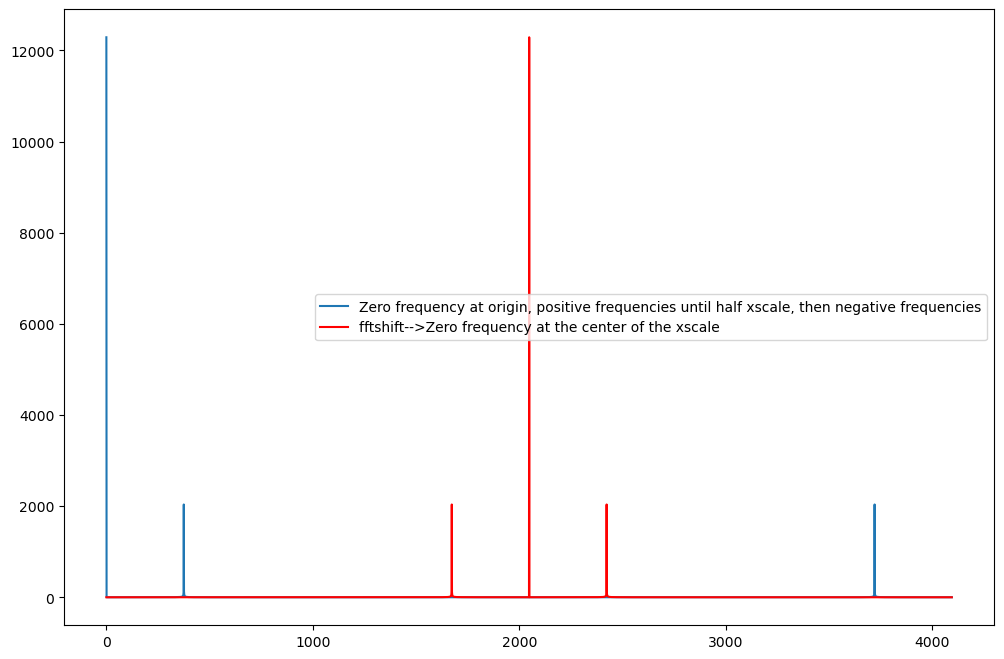

In [8]:
datatest=3+cos(2.356e15*t) 
plot(abs(fft(datatest)))
plot(fftshift(abs(fft(datatest))),'r')
legend(['Zero frequency at origin, positive frequencies until half xscale, then negative frequencies','fftshift-->Zero frequency at the center of the xscale'])

We chose here to work with <b>symmetrical</b> time or frequency domains, i.e. with the zero time and zero frequency at the center of the xcale. Since this is not the original scale of the fft, we need to fftshift the data, then fourier transform it, then fftshift it again. We can then define two new functions, called <code>FT</code> and <code>IFT</code> in order to perform Fourier Transform and Inverse Fourier Transform following this sequence: 

In [9]:
# Perform the FFT for symetric space (time or frequency)
def FT(data,NbPoints):
    """
    Parameters
    ----------
    data : array of floats
        signal defined along a symmetrical doamin we want to perform the FFT
    NbPoints : integer
        Number of points used by the fourier transform (zero-padding)
    Returns
    -------
    fast fourier transform of signal
    """
    return fftshift(fft(fftshift(data),NbPoints))

# Perform the IFFT for symetric space (time or frequency)
def IFT(data,NbPoints):
    """
    Parameters
    ----------
    data : array of floats
        signal defined along a symmetrical doamin we want to perform the inverse FFT
    NbPoints : integer
        Number of points used by the fourier transform (zero-padding)
    Returns
    -------
    inverse fast fourier transform of signal
    """
    return fftshift(ifft(fftshift(data),NbPoints))

***
### 1.3 Definition of electric fields

In order to prevent sign problems, one has to define a convention for the definition of electric field in time and frequency domains. The following convention will be use here :

#### In the time domain 

\begin{align}
E(t) = |E(t)| e^{-i \phi(t)}
\end{align}

Where $|E(t)|$ is the <b>amplitude</b> and $\phi(t)$ the <b>temporal phase</b> of the field.

Intensity (pulse envelope) is then given by : $I(t) = |E(t)|^2$. In other words, the electric field can be defined as :

\begin{align}
E(t) = \sqrt{I(t)} e^{-i \phi(t)}
\end{align}

In this lecture, we will describe the initial pulse shape using <b>Gaussian</b> shape. This is done thanks to the following function which takes as argument :
* <code>t</code> : the array of times
* <code>fwhm_t</code> : the full width half maximum value of the wanted pulse, in other words, its <b>duration</b> at half maximum


In [10]:
def calc_I_t(t, fwhm_t): 
    """
    Parameters
    ----------
    t : array of float (symmetric with respect to 0)
        time (s)
    fwhm_t : float
        Full width Half Maximum in time

    Returns
    -------
    array of floats
        Gaussian temporal enveloppe (Intensity) of the pulse
    """
    return exp(-4*log(2)*(t)**2/fwhm_t**2)

#### In the angular frequency domain 

\begin{align}
E(\omega) = |E(\omega)| e^{+i \phi(\omega)}
\end{align}

Where $|E(w)|$ is the <b>amplitude</b> and $\phi(\omega)$ the <b>spectral phase</b> of the field.

Spectrum is then given by : $I(w) = |E(\omega)|^2$. In other words, the electric field can be defined as :

\begin{align}
E(\omega) = \sqrt{I(\omega)} e^{i \phi(\omega)}
\end{align}


In this lecture, we will describe the initial spectrum using <b>Gaussian</b> shape. This is done thanks to the following function which takes as argument :
* <code>t</code> : the array of times
* <code>fwhm_t</code> : the full width half maximum value of the wanted pulse, in other words, its <b>duration</b> at half maximum

In [11]:
def calc_I_w(w, w0, fwhm_w): 
    """
    Parameters
    ----------
    w :  array of float (must contain the 0 frequency)
        angular frequency (rad.s^{-1})
    w0 : float
        central angular frequency
    fwhm_w : float
        Full width Half Maximum in angular frequency

    Returns
    ------
    array of floats
        Gaussian Intensity Spectrum
    """
    return exp(-4*log(2)*(w-w0)**2/fwhm_w**2)

With these conventions :
* Electric field $E(\omega)$ in the angular frequency domain is the <b>inverse fourier transform</b> of $E(t)$ : one should use <code>IFT(E_t,Nbw)</code>
* Electric field $E(t)$ in the time domain is the <b>fourier transform</b> of $E(\omega)$ : one should use <code>FT(E_w,Nbt)</code>


#### Let's practice :
1) We define a spectrum with a gaussian shape with central wavelength $\lambda_0 = 800$nm and a full half maximum bandwidth of $40nm$. In order to simplify interpretations, we will use the same number of points for time and angular frequencies. In principle, it is possible to use different size for arrays, but it implies some modifications in the code, in particular when comparing phases.

In [12]:
# Definition of domains
Nbt=4096
Nbw=Nbt
t=linspace(-500e-15,500e-15,Nbt)
w=time2freq(t,Nbw)

#Speed of light
c=3e8
# Pulse Central wavelength
lambda0 = 800e-9
# Wavelength FWHM
fwhm_lambda=40e-9 #nm
#pulse central angular frequency
w0=2*pi*c/lambda0 
#angular frequency FWHM
fwhm_w=2*pi*3e8*fwhm_lambda/lambda0**2

3) Compute the electric field in the time domain and its phase

In [13]:
#Spectrum
I_w=calc_I_w(w,w0,fwhm_w)

In [14]:
# Electric field (angular frequency domain)
phi_w_0 = np.zeros(len(w))
E_w=sqrt(I_w)*exp(1j*phi_w_0)
phi_w=unwrap(angle(E_w))

4. Finally, we can obtain the electric field in time domain applying Fourier transform on $E(\omega)$.

In [15]:
# Electric field (time domain)
E_t =FT(E_w,Nbt)
# Normalisation
E_t=E_t/amax(abs(E_t))
phi_t = unwrap(angle(E_t)) 

5. Plot the spectrum, intensity and phases.

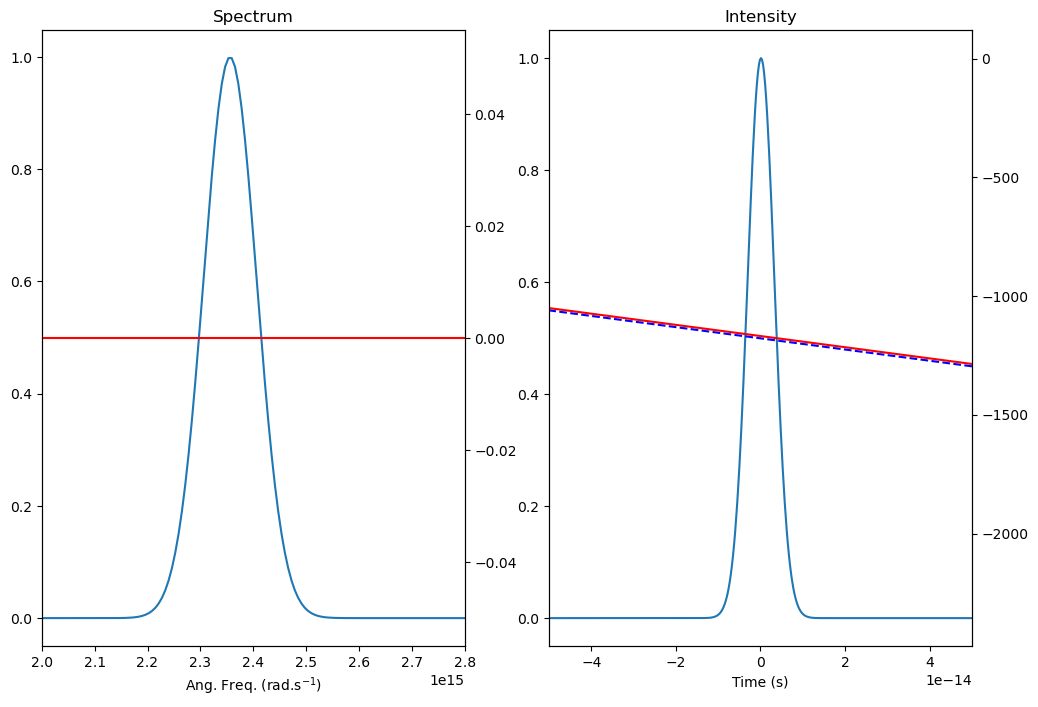

In [16]:
ax1=subplot(1,2,1)
ax1.plot(w,abs(E_w)**2,label='Spectrum')
title('Spectrum')
xlabel('Ang. Freq. (rad.s$^{-1}$)')
xlim((2e15,2.8e15))
ax11=ax1.twinx()
ax11.plot(w,phi_w,'r-',label='Ang. phase')

ax2=subplot(1,2,2)
ax2.plot(t,abs(E_t)**20,label='Intensity')
title('Intensity')
xlabel('Time (s)')
xlim((-50e-15,50e-15))
ax22=ax2.twinx()
ax22.plot(t,phi_t,'r-',label='Temp. phase')
#ax22.plot(t,-w0*(t*len(w)/len(t)+(max(t)-min(t))/2.*len(t)/len(w)),'b') #if Nbt!=Nbw
ax22.plot(t,-w0*(t+(max(t)-min(t))/2),'b--')

<b><font color='red'>Conclusion</font></b> : if the spectrum is shifted from the center of a quantity $\omega_0$, it gives a <b>linear</b> phase proportional to $-\omega_0 t$ in time domain. In other words,

$$ \phi(\omega) \neq FT[\phi(t)] $$

In order to remove this phase, on can use the following function :

In [17]:
def RemoveLinearPhase(phi_t,t):
    ind_min=int(len(t)/2-len(t)/10)
    ind_max=int(len(t)/2+len(t)/10)
    phi_t=phi_t-polyval(polyfit(t[ind_min:ind_max],phi_t[ind_min:ind_max],1),t)
    return phi_t

Which gives now :

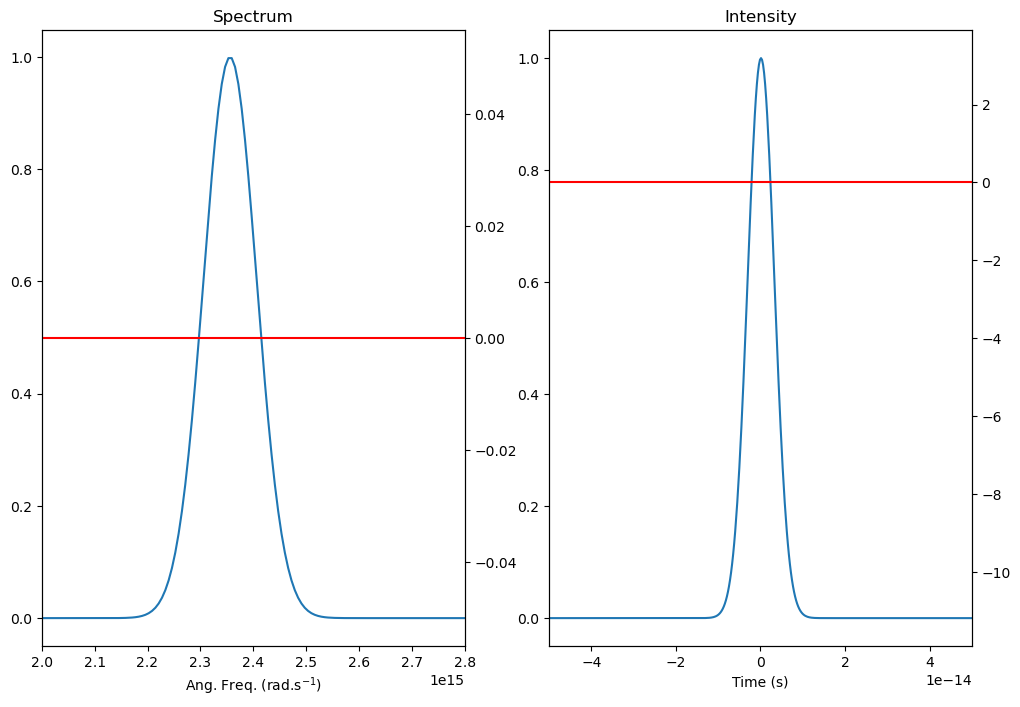

In [18]:
ax1=subplot(1,2,1)
ax1.plot(w,abs(E_w)**2,label='Spectrum')
title('Spectrum')
xlabel('Ang. Freq. (rad.s$^{-1}$)')
xlim((2e15,2.8e15))
ax11=ax1.twinx()
ax11.plot(w,phi_w,'r-',label='Ang. phase')

ax2=subplot(1,2,2)
ax2.plot(t,abs(E_t)**20,label='Intensity')
title('Intensity')
xlabel('Time (s)')
xlim((-50e-15,50e-15))
ax22=ax2.twinx()
ax22.plot(t,RemoveLinearPhase(phi_t,t),'r-',label='Temp. phase')

***
## 1.4 Measurement of the duration

### 1.4.1 Full Width Half Maximum
One way to measure the duration of a pulse is to use the full width half maximum (FWHM). This can be done using the following function :

In [19]:
def calcFWHM(X,Y):
    """
    Parameters
    ----------
    X : float
        X axis
    Y : float
        Y axis

    Returns
    -------
    float
        Value of the Full-width-half-maximum
    """
    ind_max=Y.argmax()
    ind_inf_half_max=abs(Y[0:ind_max]-Y[ind_max]/2).argmin()
    ind_sup_half_max=abs(Y[ind_max:]-Y[ind_max]/2).argmin()+ind_max
    
    return X[ind_sup_half_max] - X[ind_inf_half_max] #return the difference (full width)

Using the electric field defined previously, we find a duration of :

In [20]:
print('The FWHM duration of a Fourier Limited pulse at {:.1f} nm with a wavelength bandwidth (FWHM) of {:.1f} nm is equal to {:.1f} fs'\
      .format(lambda0*1e9,fwhm_lambda*1e9,calcFWHM(t,abs(E_t)**2.0)*1e15))

The FWHM duration of a Fourier Limited pulse at 800.0 nm with a wavelength bandwidth (FWHM) of 40.0 nm is equal to 23.4 fs


If the pulse shape is structured (i.e. if the shape is not a nice gaussian), FWHM could not reflect this structuration and thus gives a poor etimation of the real duration. In this case, it is better to use an other metric which takes into account the full temporal distribution of the pulse. 

### 1.4.2 RMS calculation for the duration 
This measurement is defined as :

\begin{align}
\tau_{RMS} = \sqrt{ \frac{\int t^2 I(t) dt}{\int I(t)  dt} }
\end{align}

And can be performed using the following function :

In [21]:
def calcRMS(X,Y):
    """
    Parameters
    ----------
    X : float
        X axis
    Y : float
        Y axis

    Returns
    -------
    float
        Value of the RMS duration
    """
    from scipy.integrate import simpson
    Y=roll(Y,int(len(Y)/2)-argmax(abs(Y)))
    num=simpson(X**2*Y,x=X)
    den=simpson(Y,x=X)
    return sqrt(num/den) #return the RMS duration 

Which gives for the previously defined pulse :

In [22]:
print('The RMS duration of a Fourier Limited pulse at {:.1f} nm with a wavelength bandwidth (FWHM) of {:.1f} nm is equal to {:.1f} fs'\
      .format(lambda0*1e9,fwhm_lambda*1e9,calcRMS(t,abs(E_t)**2.0)*1e15))

The RMS duration of a Fourier Limited pulse at 800.0 nm with a wavelength bandwidth (FWHM) of 40.0 nm is equal to 10.0 fs


***
## 1.5 Time - Frequency representations

A key feature to describe pulse propagation is to be able to describe how the frequency content of a pulse is evolving as a function of time. To this end, we will introduce two mathematical tools that allows this analysis.

### 1.5.1 Gabor transform (spectrogram)

From a mathematical point of view, the Gabor transform can be described as the FFT of the product of the signal with a gate $G(t-\tau)$ :

\begin{align}
\mathcal{G(\omega,\tau}) = FT(S(t)G(t-\tau))
\end{align}

In our case, the gate is represented  by a Gaussian whose width is related to a parameter $\alpha$. You could redefine the function to use the FHWM parameter rather than $\alpha$ if you prefer. You could also use other types of gate fuctions (rectangular, supergaussian...)

In [23]:
def gabor(t,E_t,Nbw,alpha):
    """
    Parameters
    ----------
    t : array of floats
        time (size Nbt)
    E_t : array of floats
        Electric field in time (size Nbt)
    Nbw : integer
        Number of frequency
    alpha : float
        related to the width of the gaussian -- Same units as time

    Returns
    -------
    2D array float
        Gabor transform (Nbw,Nbt)
    """
    def gaussian(t,alpha):
        return 1./2*sqrt(pi*alpha)*exp(-t**2/(alpha)**2)
    E_w=zeros((len(t),Nbw),dtype=complex)
    for i,tau in enumerate(t):
        E_w[i,:]=FT(E_t*gaussian(t-tau,alpha),Nbw)
    return flipud(transpose(E_w))

# flipud is used to flip upside-down the matrix, in order to use pcolormesh for the plotting. If you prefer
# to use imshow, do not forget to remove this flipud command.

Let's apply this <b>Gabor</b> transform to the previous pulse, with $\alpha = 10 \times 10^{-15}$ :

In [24]:
alpha=20.0e-15
G=gabor(t,E_t,Nbw,alpha)

We can study the effect of $\alpha$ on the temporal and frequency resolution. For that we define a function to plot the gabor distribution :

In [25]:
def plot_gabor(G,t,w,tmin,tmax,wmin,wmax,name):
    """
    Parameters
    ----------
    G : 2D array of floats (Nbw,Nbt)
        Gabor distribution to plot
    t : array of floats
        time (Nbt)
    w : array of floats
        angular frequency (Nbw)
    tmin,tmax : floats
        time limits for plotting
    wmin,wmax : floats
        angular frequency limits
    name : string
        name of the plot
    Returns
    -------
    none
    """
    
    ind_tmin=abs(t-tmin).argmin()
    ind_tmax=abs(t-tmax).argmin()
    ind_wmin=abs(w-wmin).argmin()
    ind_wmax=abs(w-wmax).argmin()
#intensity
    I_G=abs(G[ind_wmin:ind_wmax,ind_tmin:ind_tmax])**2
    T,W=meshgrid(t[ind_tmin:ind_tmax],w[ind_wmin:ind_wmax])
    
    fig, ax1 = subplots()
    im = ax1.pcolormesh(T,W,I_G,cmap='jet',shading='auto')
    xlabel('Time (s)')
    ylabel('Angular frequency (rad.s$^{-1}$)')
    title(name)

    # Add pulse and marginal along time
    ax1.set_xlim(tmin,tmax)
    ax1.set_ylim(wmin,wmax)
    fig.colorbar(im)
    ax2=ax1.twinx()
    ax2.plot(t[ind_tmin:ind_tmax],sum(I_G,axis=0)/amax(sum(I_G,axis=0)),'w',alpha=0.5,label='Temporal marginal')
    ax2.set_ylim([0,5])
    legend()
    return 'plot_gabor done !'

'plot_gabor done !'

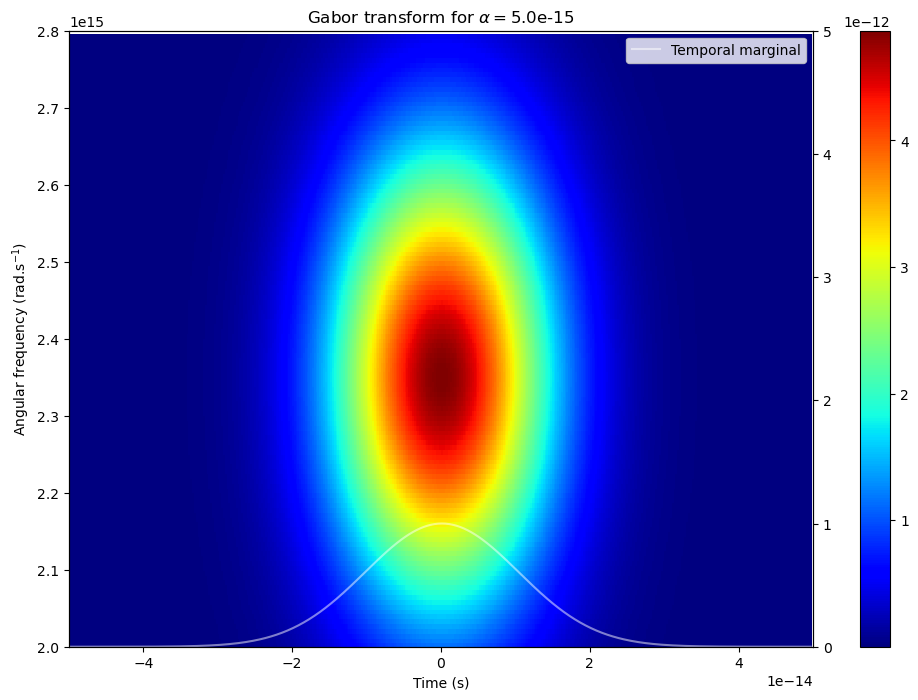

In [26]:
    #Define the limits for the plots
alpha=5.0e-15
G=gabor(t,E_t,Nbw,alpha)    
    
tmin,tmax=-50e-15,50e-15
wmin,wmax=2e15,2.8e15
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor transform for $\\alpha =${:.1e}'.format(alpha))

***
### Try by yourself !
<div class="alert alert-block alert-info">
1) Change the spectral bandwidth of the pulse and look at the influence on the duration
    
2) Change the value of $\alpha$ to see how it affects temporal and spectral resolution of the Gabor analysis.
    </div>

What Limitation do you see in such an operation ? How should one choose $\alpha$ to be able to get proper understanding of the pulse properties ?

***
### 1.5.2 Wigner distribution

Wigner distribution is defined as :

\begin{align}
\mathcal{W}(t,\omega) = FT\left(S(t+\frac{\tau}{2})S^*(t-\frac{\tau}{2})\right)
\end{align}

In order to get the signal at $t+\frac{\tau}{2}$ and $t-\frac{\tau}{2}$ we use the Fourier Transform shift theorem :

<b>Warning this takes time to execute</b>

Finally, the complete function that computes the <b>Wigner distribution</b> can be defined as :

In [27]:
def wigner(Ex,t,w):
    """
    Parameters
    ----------
    Ex : array of floats (Nbt)
        Temporal electric field
    t : array of floats
        time (Nbt)
    w : array of floats
        angular frequency (Nbw)
    Returns
    -------
    none
    """
    N=len(Ex)
    # Generate linear vector           
    EX1 =ifft(outer(fftshift(fft(Ex)),ones(N))*exp( -1j*outer(w,t)/2 ),axis=0)
    EX2 = ifft(outer(fftshift(fft(Ex)),ones(N))*exp( 1j*outer(w,t)/2 ),axis=0)
    W=real(fftshift(fft(fftshift(EX1*conj(EX2),axes=1),axis=1),axes=1))
    return transpose(W)

In [28]:
WIG=wigner(E_t,t,w)

We can also define a function to plot the <b>Wigner distribution</b> using <code>pcolormesh</code> (if you want to use <code>pcolor</code> function instead, you need to remove the <code>flipud</code> command at the end of <code>wigner</code> function).

In order to get a better constrated picture, we will use a homemade colormap named <code>superdarker</code>. For that, the file <b>superdarker.txt</b> must be placed in your working directory.

In [29]:
from matplotlib.colors import ListedColormap

Cmap_Name = 'superdarker' # Colormap name
Loaded_Cmap = np.loadtxt("./superdarker.txt")
# Register the Loaded Colormap
Listed_CustomCmap = ListedColormap(Loaded_Cmap, name=Cmap_Name)
colormaps.register(name=Cmap_Name, cmap= Listed_CustomCmap)

In [30]:
def plot_wigner(WIG,t,w,tmin,tmax,wmin,wmax,name):
    """
    Parameters
    ----------
    WIG : 2D array of floats (Nbw,Nbt)
        Wigner distribution to plot
    t : array of floats
        time (Nbt)
    w : array of floats
        angular frequency (Nbw)
    tmin,tmax : floats
        time limits for plotting
    wmin,wmax : floats
        angular frequency limits
    name : string
        name of the plot
    Returns
    -------
    none
    """
    ind_tmin=abs(t-tmin).argmin()
    ind_tmax=abs(t-tmax).argmin()
    ind_wmin=abs(w-wmin).argmin()
    ind_wmax=abs(w-wmax).argmin()
    #intensity
    WIGNER=WIG[ind_wmin:ind_wmax,ind_tmin:ind_tmax]
    T,W=meshgrid(t[ind_tmin:ind_tmax],w[ind_wmin:ind_wmax])
    
    fig, ax1 = subplots()
    ax1.set_xlim(tmin,tmax)
    ax1.set_ylim(wmin,wmax)
    wig=ax1.pcolormesh(T,W,WIGNER,cmap='superdarker',shading='gouraud',\
               vmin=-amax(WIGNER),vmax=amax(WIGNER))
    xlabel('Time (s)')
    ylabel('Angular frequency (rad.s$^{-1}$)')
    title(name)
    ax1.axis('auto')
   
    fig.colorbar(wig,ax=ax1)
    
    ax2=ax1.twinx()
    ax2.plot(t[ind_tmin:ind_tmax],sum(WIGNER,axis=0)/amax(sum(WIGNER,axis=0)),'w',alpha=0.5,label='Pulse')
    ax2.set_ylim([0,5])
    ax3=ax1.twiny()
    ax3.plot(sum(WIGNER,axis=1)/amax(sum(WIGNER,axis=1)),w[ind_wmin:ind_wmax],'w--',alpha=0.5,label='Spectrum')
    ax3.set_xlim([0,5])
    
    # Just to check that the marginals corresponds to the pulse and spectrum
    # In the function these two lines will be removed
    #ax2.plot(t[ind_tmin:ind_tmax],abs(E_t[ind_tmin:ind_tmax])**2.0/amax(abs(E_t[ind_tmin:ind_tmax])**2.0),'w--',alpha=0.5,label='pulse')
    #ax3.plot(abs(E_w[ind_wmin:ind_wmax])**2.0/amax(abs(E_w[ind_wmin:ind_wmax])**2.0),w[ind_wmin:ind_wmax],'w--',alpha=0.5,label='spectrum')
    fig.legend()
    
    return 0

0

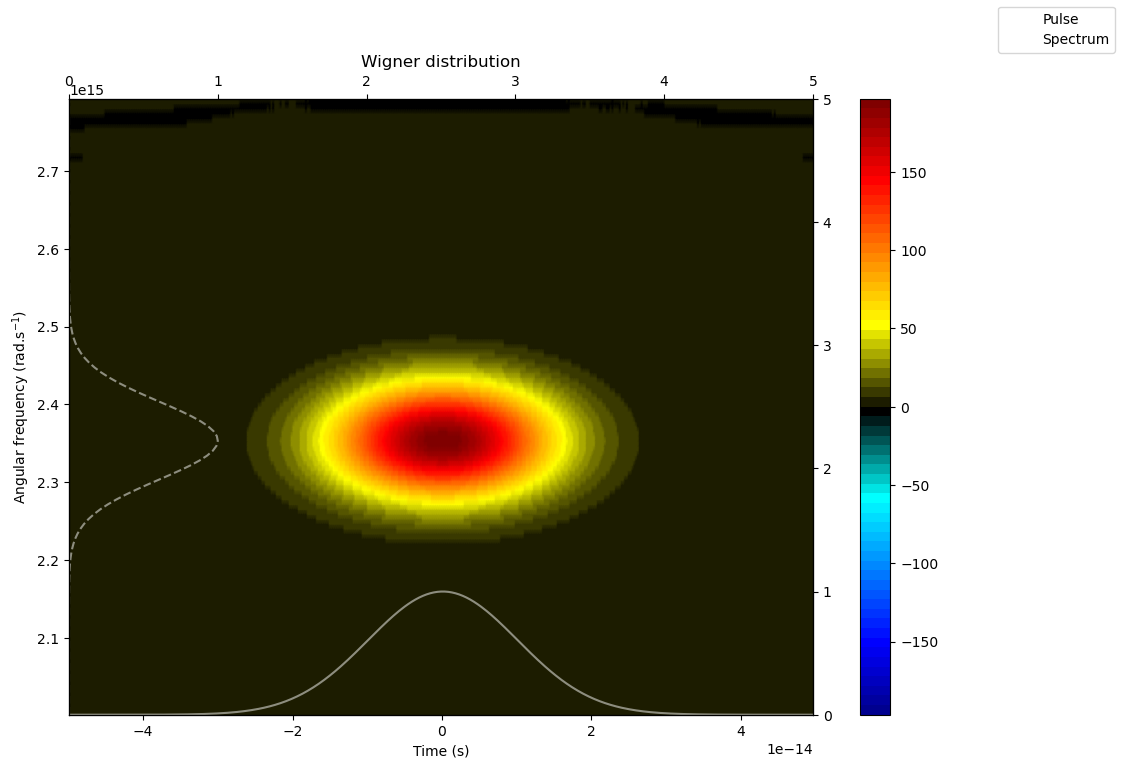

In [31]:
#define the limits for plotting
tmin,tmax=-50e-15,50e-15
wmin,wmax=2e15,2.8e15

plot_wigner(WIG,t,w,tmin,tmax,wmin,wmax,'Wigner distribution')

***
## 2. Influence of the spectral phase

The aim of this part is to discuss the influence of the spectral phase on the behavior of a pulse. We will look in more detail at the effect of polynomial spectral phase on the pulse properties.

### 2.1 Definition of the initial pulse

First, we define the time and frequency domains

In [32]:
# Time and frequency domain
# Definition of domains
Nbt=4096
Nbw=Nbt
t=linspace(-500e-15,500e-15,Nbt)
w=time2freq(t,Nbw)
# speed of light
c=3.e8

Then, we define the characteristics of the initial pulse in frequency domain. We can also generate a chirped pulse.

2.3561944901923453 0.11780972450961727


Text(-4e-14, 0.4, 'T(RMS) =10.0 fs')

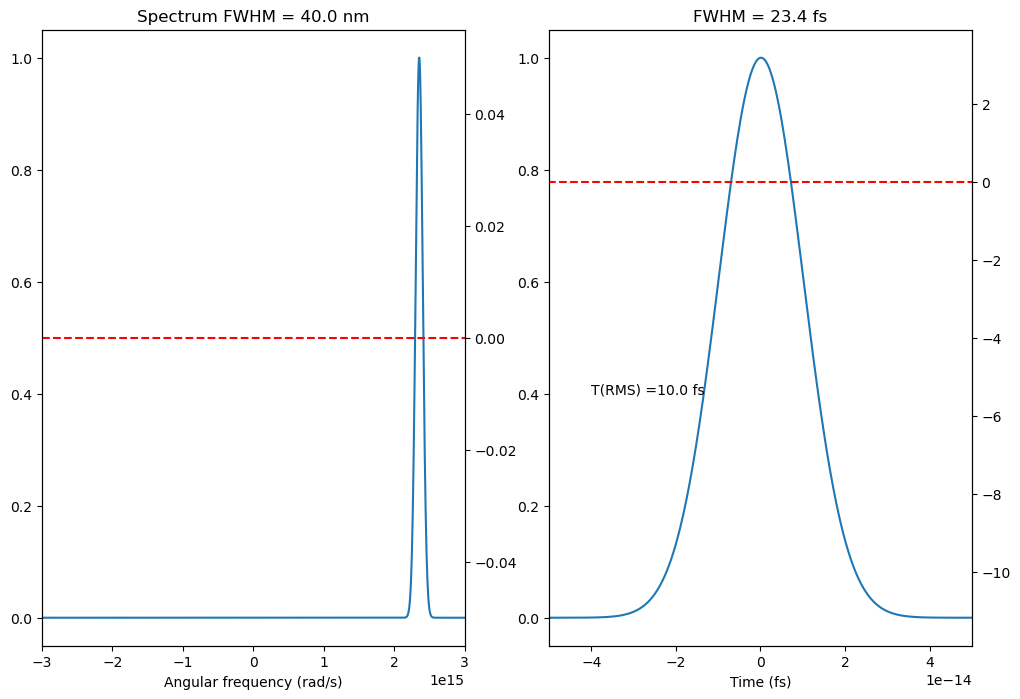

In [33]:
# pulse central wavelength
lambda0=800e-9 #nm
# Wavelength FWHM
fwhm_lambda=40e-9  #nm
#pulse central angular frequency
w0=2*pi*3e8/lambda0 
#angular frequency FWHM
fwhm_w= 2*pi*3e8*fwhm_lambda/lambda0**2


print(w0*1E-15, fwhm_w *1E-15)

phi_w_0 =  np.zeros(len(w))

# Define a pulse in the spectral domain
E_w_0p=sqrt(calc_I_w(w,w0,fwhm_w))*exp(phi_w_0*1j) # Positive part
E_w_0m = np.zeros(len(w))
#E_w_0m=sqrt(calc_I_w(w,-w0,fwhm_w))*exp(phi_w_0*1j) # Negative part
E_w_0 = E_w_0p + E_w_0m
phi_w_0=unwrap(angle(E_w_0))
# Get the pulse in the time domain
E_t_0=FT(E_w_0,Nbt)
phi_t_0=unwrap(angle(E_t_0))
phi_t_0=RemoveLinearPhase(phi_t_0,t)

figure("Initial Pulse 40nm FWHM")
ax1=subplot(1,2,1)
ax11 = ax1.twinx()
ax1.plot(w,abs(E_w_0)**2/max(abs(E_w_0)**2.0))
ax1.set_xlim([-3e15,3e15])
ax1.set_xlabel('Angular frequency (rad/s)')
ax1.set_title('Spectrum FWHM = {:3.1f} nm'.format(fwhm_lambda*1e9))
ax11.plot(w,phi_w_0,'--r')

ax2=subplot(1,2,2)

ax2.plot(t,abs(E_t_0)**2/max(abs(E_t_0)**2))
ax22 = ax2.twinx()
ax22.plot(t,phi_t_0,'--r')
ax2.set_xlabel('Time (fs)')
ax2.set_xlim([-50e-15,50e-15])
ax2.set_title('FWHM = {:2.1f} fs'.format(calcFWHM(t,abs(E_t)**2.0)*1e15))
ax2.text(-4e-14,0.4,"T(RMS) ={:2.1f} fs".format(calcRMS(t,abs(E_t)**2.0)*1e15))

### 2.2 Add a linear spectral phase

For that, we introduce a parameter $\tau = -50$ fs such that the linear spectral phase is defined as :

\begin{align}
\phi_{lin} = -(\omega-\omega_0)\tau
\end{align}

Conclusion : time shift


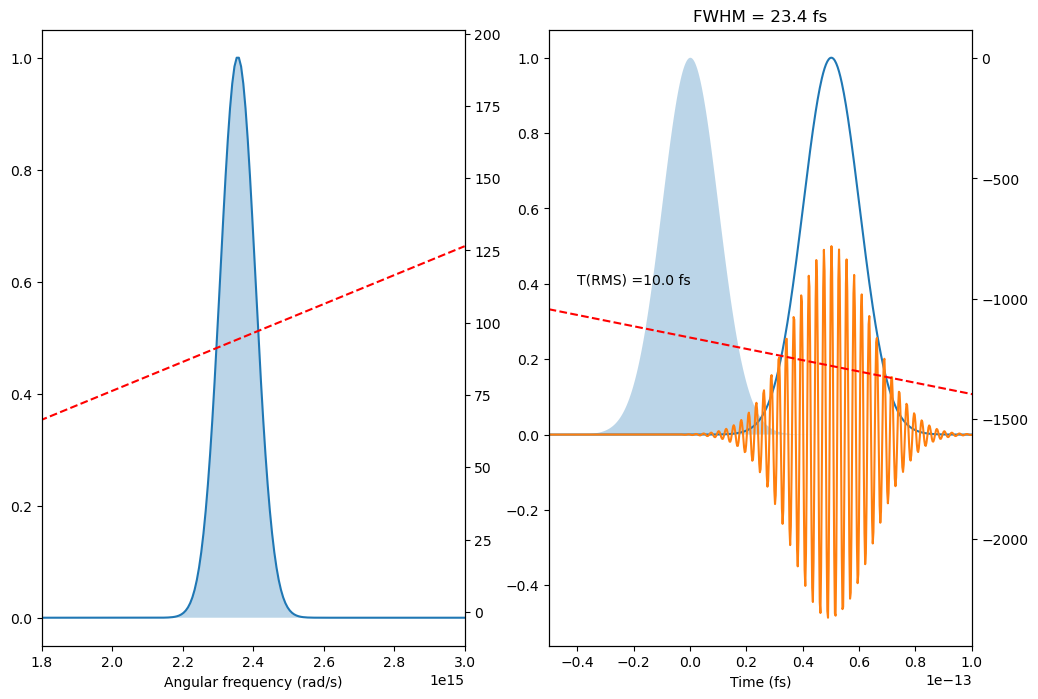

In [34]:
# parameter tau
tau=-50e-15 #fs
# Linear phase
phi_w_lin = -(w-w0)*tau

# Electric field in the angular frequency domain
E_w_lin=sqrt(calc_I_w(w,w0,fwhm_w))*exp(phi_w_lin*1j)
phi_w_lin=unwrap(angle(E_w_lin))

# Electric field in the time domain
E_t_lin=FT(E_w_lin,Nbt)

phi_t_lin=unwrap(angle(E_t_lin))

figure("Linear Phase")
ax1=subplot(1,2,1)
ax1.plot(w,abs(E_w_lin)**2/max(abs(E_w_lin)**2))
ax1.fill_between(w, 0,abs(E_w_0)**2/max(abs(E_w_0)**2) ,alpha=0.3)
ax1.set_xlim([1.8e15,3e15])
ax1.set_xlabel('Angular frequency (rad/s)')
#ax1.set_title('Spectrum FWHM = {:3.1f} nm'.format(fwhm_lambda*1e9))
ax11 = ax1.twinx()
ax11.plot(w,phi_w_lin,'--r')

ax2=subplot(1,2,2)
ax2.plot(t,abs(E_t_lin)**2/max(abs(E_t_lin)**2))
ax2.plot(t,0.5*imag(E_t_lin)/max(imag(E_t_lin)))
ax2.fill_between(t, 0,abs(E_t_0)**2 /max(abs(E_t_0)**2),alpha=0.3)
ax22 = ax2.twinx()
ax22.plot(t,phi_t_lin,'--r')
ax2.set_xlabel('Time (fs)')
ax2.set_xlim([-50e-15,100e-15])
ax2.set_title('FWHM = {:2.1f} fs'.format(calcFWHM(t,abs(E_t_lin)**2)*1e15))
ax2.text(-4e-14,0.4,"T(RMS) ={:2.1f} fs".format(calcRMS(t,abs(E_t_lin)**2.)*1e15))

print("Conclusion : time shift")

<b><font color='red'>Conclusion</font></b> : a linear spectral phase induces a time shift of the pulse.

#### Gabor transform

'plot_gabor done !'

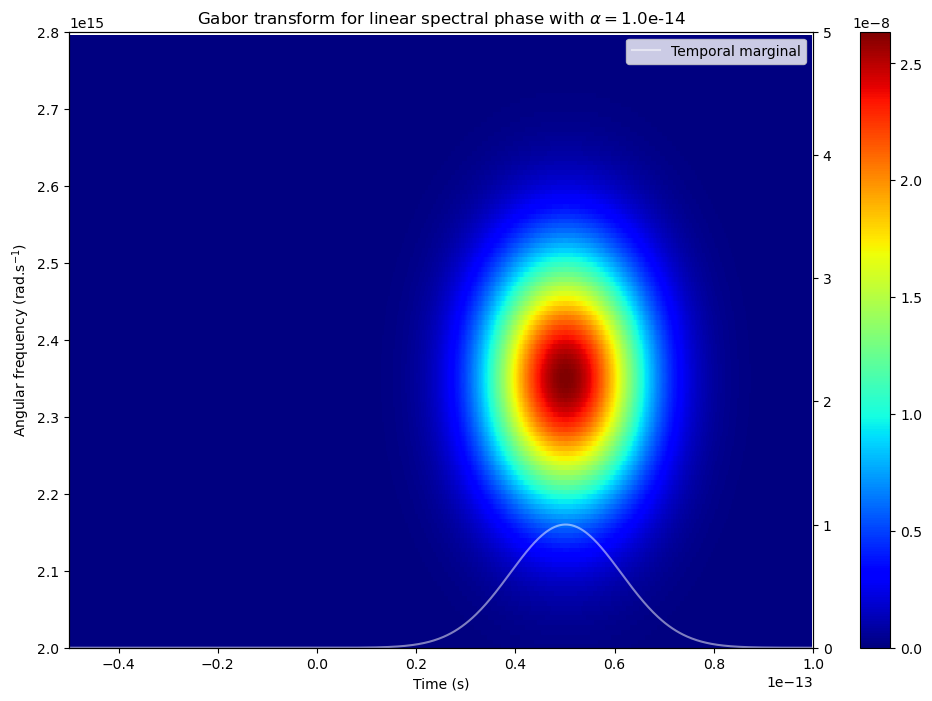

In [35]:
    #Define the limits for the plots
alpha=10.0e-15
G_lin=gabor(t,E_t_lin,Nbw,alpha)    
    
tmin,tmax=-50e-15,100e-15
wmin,wmax=2e15,2.8e15
plot_gabor(G_lin,t,w,tmin,tmax,wmin,wmax,'Gabor transform for linear spectral phase with $\\alpha =${:.1e}'.format(alpha))

#### Wigner distribution

0

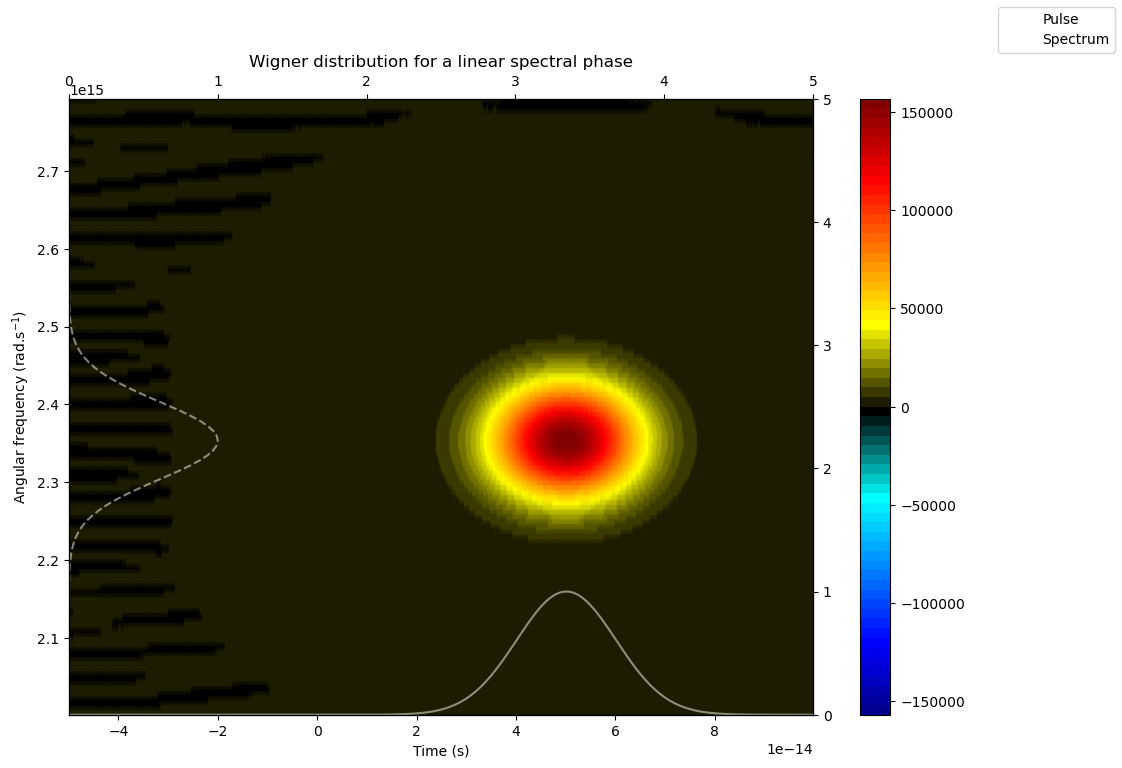

In [36]:
W_lin=wigner(E_t_lin,t,w)    
    
tmin,tmax=-50e-15,100e-15
wmin,wmax=2e15,2.8e15
plot_wigner(W_lin,t,w,tmin,tmax,wmin,wmax,'Wigner distribution for a linear spectral phase')

### 2.2 Add a quadratic spectral phase
For that we introduce a parameter $\phi_2 = 300$ fs$^2$, such that the quadratic spectral phase is defined as :

\begin{align}
\phi_{quad}=\phi_2(\omega-\omega_0)^2
\end{align}

Conclusion : Temporal broadening


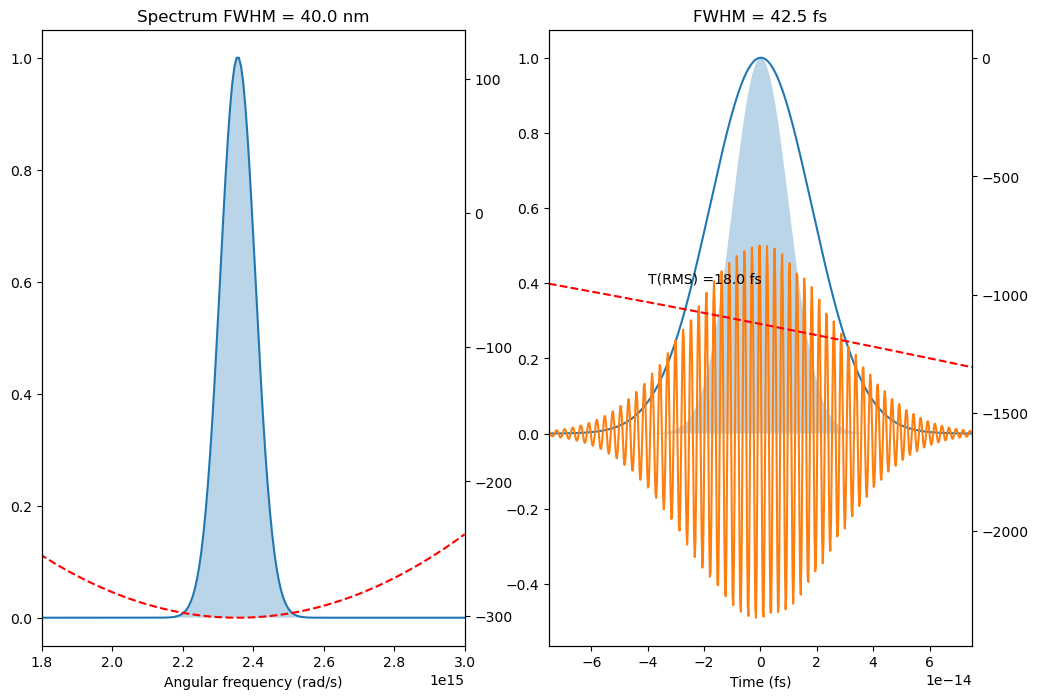

In [42]:
#parameter phi2
phi2=300*(1e-15)**2.0 #fs^2
#quadratic spectral phase
phi_w_quad = + phi2*(w-w0)**2
#Electric field in the angular frequency domain
E_w_quad=sqrt(calc_I_w(w,w0,fwhm_w))*exp(0.5*phi_w_quad*1j)
phi_w_quad=unwrap(angle(E_w_quad))

#Electric field in the time domain
E_t_quad=FT(E_w_quad,Nbt)
phi_t_quad=unwrap(angle(E_t_quad))

# Figure (3)
figure("Quadratic phase")
ax1=subplot(1,2,1)

ax1.plot(w,abs(E_w_quad)**2/max(abs(E_w_quad)**2))
ax1.fill_between(w, 0,abs(E_w_0)**2/max(abs(E_w_0)**2) ,alpha=0.3)
ax1.set_xlim([1.8e15,3e15])
ax1.set_xlabel('Angular frequency (rad/s)')
ax1.set_title('Spectrum FWHM = {:3.1f} nm'.format(fwhm_lambda*1e9))
ax11 = ax1.twinx()
ax11.plot(w,phi_w_quad,'--r')
#ax11.set_ylim([0,250])

ax2=subplot(1,2,2)
ax2.plot(t,abs(E_t_quad)**2/max(abs(E_t_quad)**2))
ax2.plot(t,0.5*imag(E_t_quad)/max(imag(E_t_quad)))
ax2.fill_between(t, 0,abs(E_t_0)**2 /max(abs(E_t_0)**2),alpha=0.3)
ax22 = ax2.twinx()
ax22.plot(t,phi_t_quad,'--r')
ax2.set_xlabel('Time (fs)')
ax2.set_xlim([-75e-15,75e-15])
ax2.set_title('FWHM = {:2.1f} fs'.format(calcFWHM(t,abs(E_t_quad)**2)*1e15))
ax2.text(-4e-14,0.4,"T(RMS) ={:2.1f} fs".format(calcRMS(t,abs(E_t_quad)**2.)*1e15))
print("Conclusion : Temporal broadening")


<b><font color='red'>Conclusion</font></b> : a positive quadratic spectral phase induces a temporal broadening of the pulse.

What happens if we take a negative spectral phase ? How could we use this.

#### Gabor transform

'plot_gabor done !'

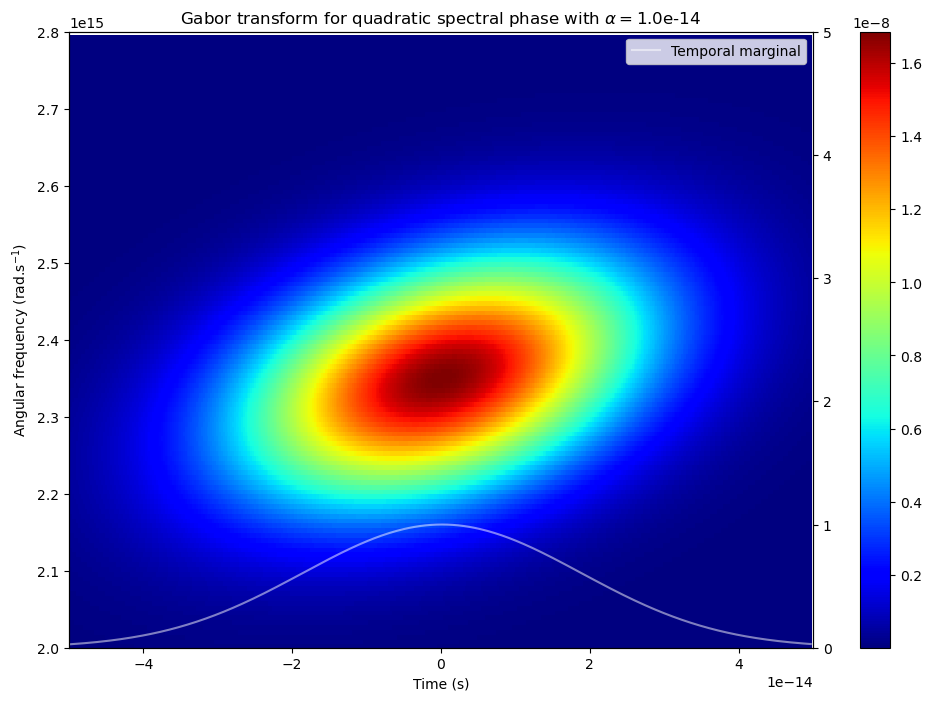

In [43]:
#Define the limits for the plots
alpha=10.0e-15
G_quad=gabor(t,E_t_quad,Nbw,alpha)    
    
tmin,tmax=-50e-15,50e-15
wmin,wmax=2e15,2.8e15
plot_gabor(G_quad,t,w,tmin,tmax,wmin,wmax,'Gabor transform for quadratic spectral phase with $\\alpha =${:.1e}'.format(alpha))

#### Wigner distribution

0

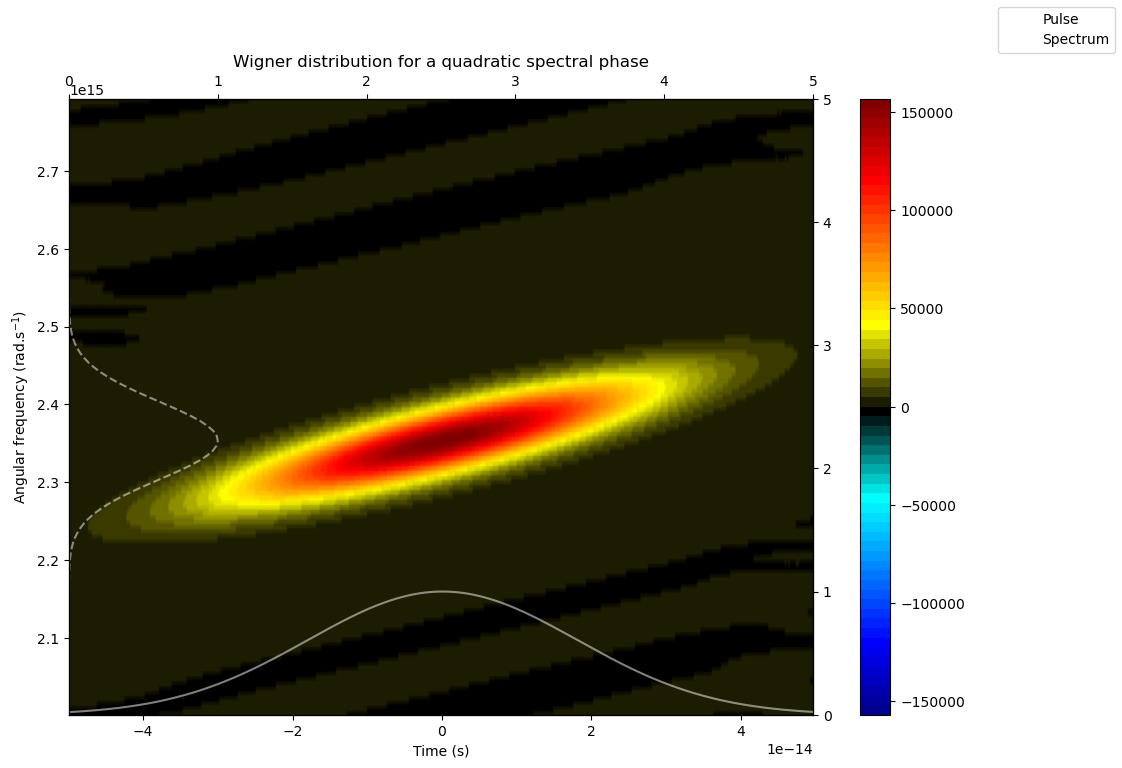

In [44]:
W_quad=wigner(E_t_quad,t,w)    
    
tmin,tmax=-50e-15,50e-15
wmin,wmax=2e15,2.8e15
plot_wigner(W_quad,t,w,tmin,tmax,wmin,wmax,'Wigner distribution for a quadratic spectral phase')

### 2.3 Add a cubic spectral phase
For that we introduce a parameter $\phi_3=2000$ fs$^3$ such that the cubic spectral phase is defined as :

\begin{align}
\phi_{cub} = \phi_3 (\omega - \omega_0)^3
\end{align}

Conclusion : Non Gaussian pulse, assymmetric, pre or post pulse.


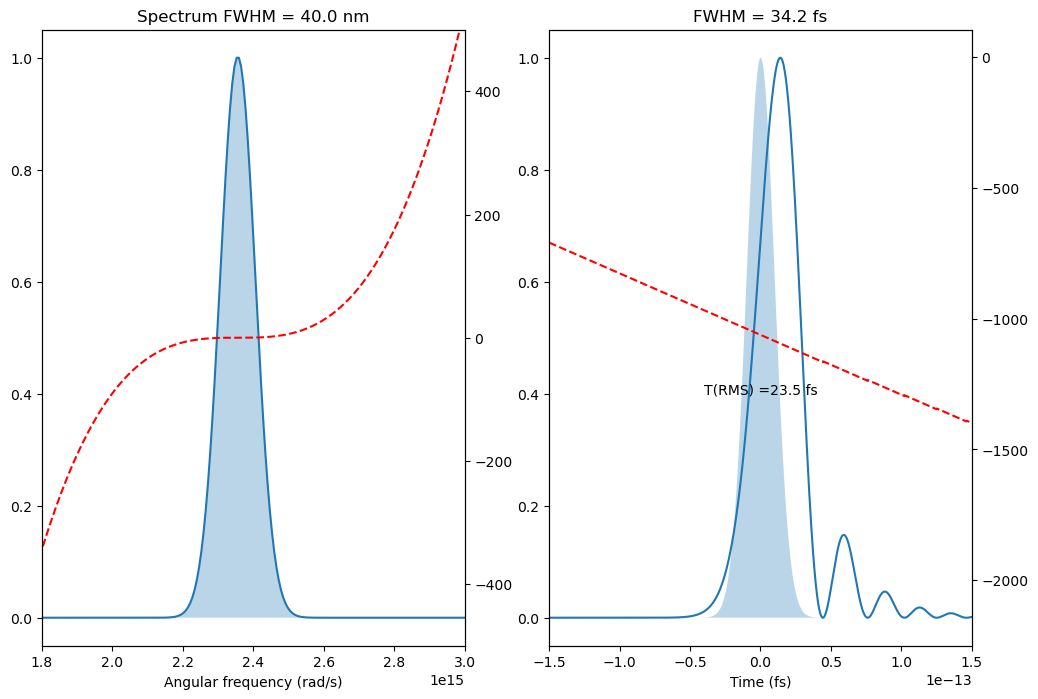

In [46]:
# Parameter phi_3
phi3=2000*(1e-15)**3.0 #fs^3
#Cubic spectral phase
phi_w_cub = phi3*(w-w0)**3

#Electric field in the angular frequency domain
E_w_cub=sqrt(calc_I_w(w,w0,fwhm_w))*exp(phi_w_cub*1j)


#Electric field in the time domain
E_t_cub=FT(E_w_cub,Nbt)
phi_t_cub=unwrap(angle(E_t_cub))

# Figure (3)
figure("Cubic phase")
ax1=subplot(1,2,1)

ax1.plot(w,abs(E_w_cub)**2/max(abs(E_w_cub)**2))
ax1.fill_between(w, 0,abs(E_w_0)**2/max(abs(E_w_0)**2) ,alpha=0.3)
ax1.set_xlim([1.8e15,3e15])
ax1.set_xlabel('Angular frequency (rad/s)')
ax1.set_title('Spectrum FWHM = {:3.1f} nm'.format(fwhm_lambda*1e9))
ax11 = ax1.twinx()
ax11.plot(w,phi_w_cub,'--r')
ax11.set_ylim([-500,500])

ax2=subplot(1,2,2)
ax2.plot(t,abs(E_t_cub)**2/max(abs(E_t_cub)**2))
ax2.fill_between(t, 0,abs(E_t_0)**2 /max(abs(E_t_0)**2),alpha=0.3)
ax22 = ax2.twinx()
ax22.plot(t,phi_t_cub,'--r')
ax2.set_xlabel('Time (fs)')
ax2.set_xlim([-150e-15,150e-15])
ax2.set_title('FWHM = {:2.1f} fs'.format(calcFWHM(t,abs(E_t_cub)**2)*1e15))
ax2.text(-4e-14,0.4,"T(RMS) ={:2.1f} fs".format(calcRMS(t,abs(E_t_cub)**2.)*1e15))
print("Conclusion : Non Gaussian pulse, assymmetric, pre or post pulse.")

<b><font color='red'>Conclusion</font></b> : a cubic spectral phase induces a non gaussian pulse, with pre or post pulses

#### Gabor transform

'plot_gabor done !'

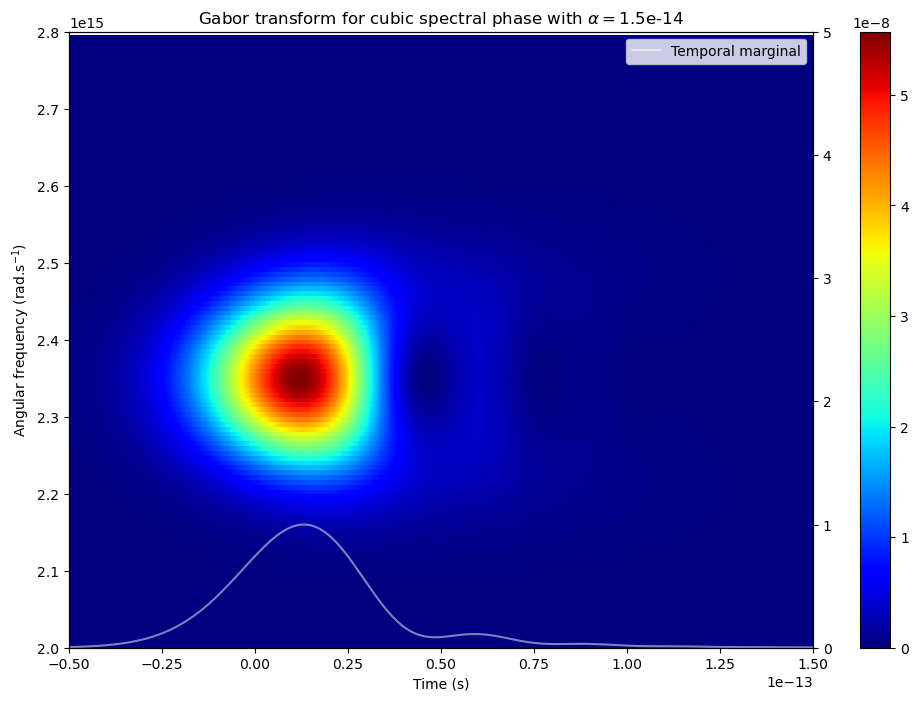

In [47]:
#Define the limits for the plots
alpha=15.0e-15
G_cub=gabor(t,E_t_cub,Nbw,alpha)    
    
tmin,tmax=-50e-15,150e-15
wmin,wmax=2e15,2.8e15
plot_gabor(G_cub,t,w,tmin,tmax,wmin,wmax,'Gabor transform for cubic spectral phase with $\\alpha =${:.1e}'.format(alpha))

#### Wigner distribution

0

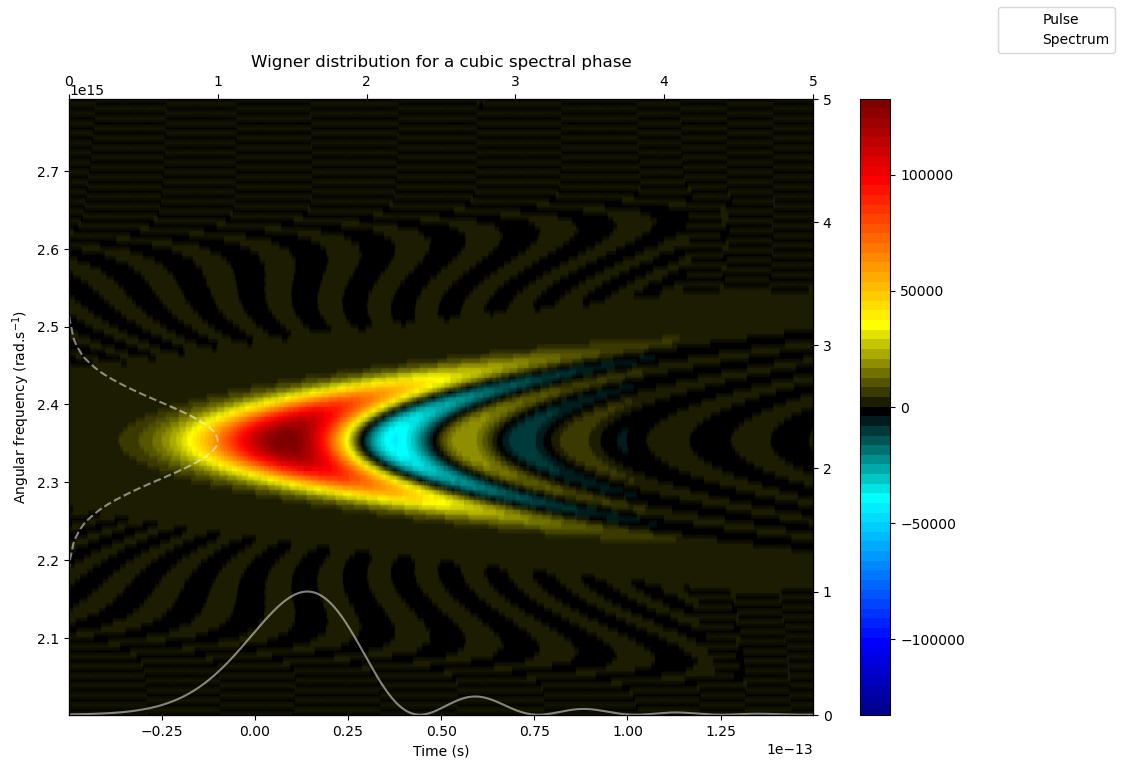

In [48]:
W_cub=wigner(E_t_cub,t,w)    
    
tmin,tmax=-50e-15,150e-15
wmin,wmax=2e15,2.8e15
plot_wigner(W_cub,t,w,tmin,tmax,wmin,wmax,'Wigner distribution for a cubic spectral phase')

Why do the Gabor and Wigner transform look so different in this case ? What image should we trust ?

### 2.4 Let's practice
<div class="alert alert-block alert-info">

Send the pulse with cubic phase into a mach-zehnder interferometer, which creates two replicas, delayed by a delay tautau. Define the resulting electric field and calculate its Gabor and Wigner distributions. See how they depend on the delay. What is the main difference between these two representations ? What happens to the spectrum? 

0

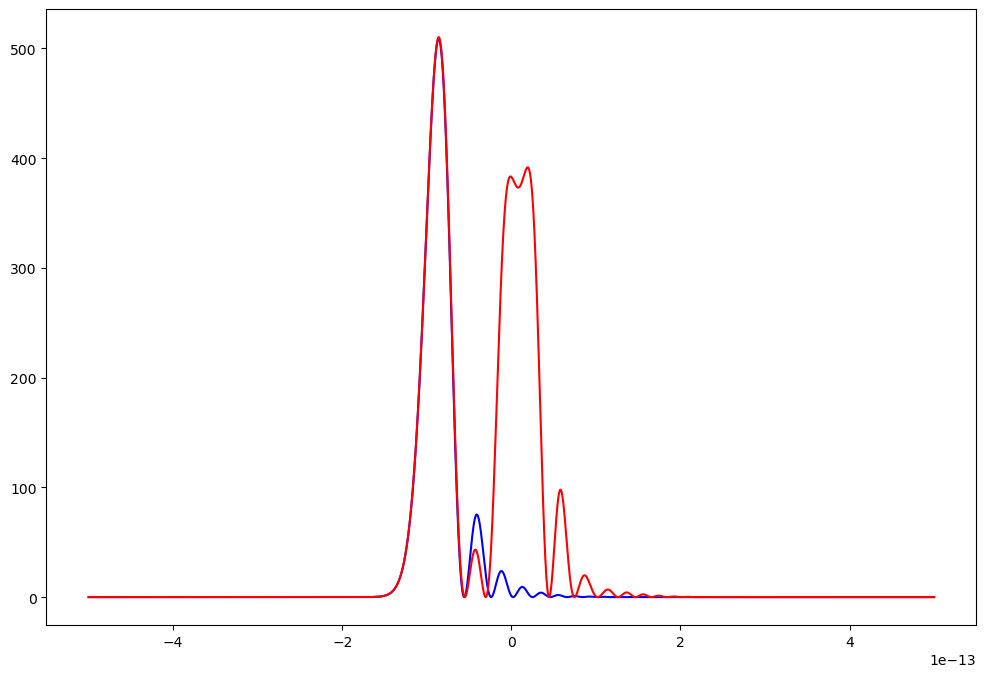

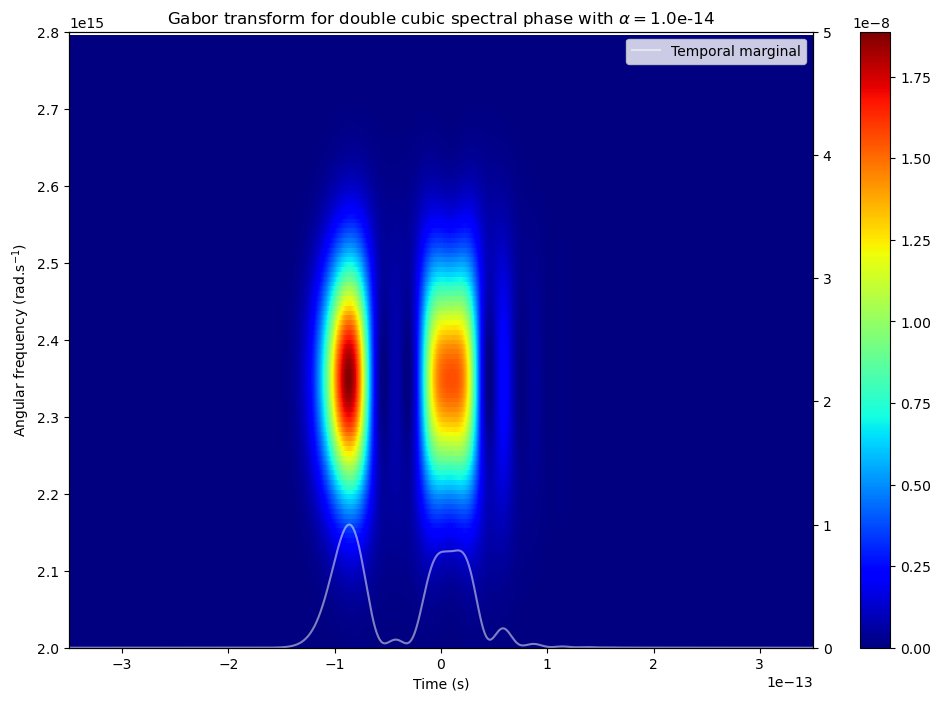

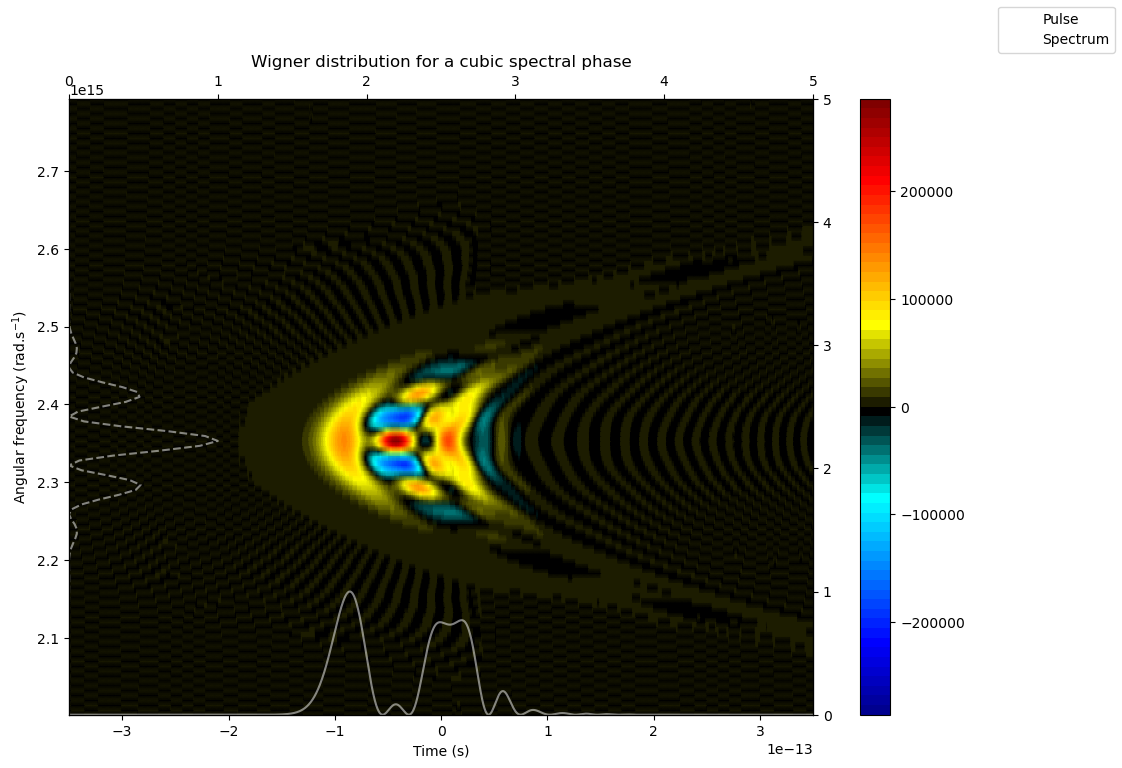

In [49]:
# Define the delay between your pulses. 
tautau=-100

#plot(roll(abs(E_t_cub)**2,50)) #ROLL would be the quick and dirty way

#phi_w_lin=unwrap(angle(E_w_lin))
# Electric field in the time domain
#E_t_lin=FT(E_w_lin,Nbt)


# Create a replica of E_t_b, delayed by tautau. You can use the roll command to do it (quick and dirty), or plug in a linear phase in the frequency domain

# Parameter phi_3

#Cubic spectral phase


phi1=tautau*(1e-15)#fs^1
phi3=2000*(1e-15)**3.0 #fs^3
phi_w_cubshift =phi1*(w-w0)+phi3*(w-w0)**3
#Electric field in the angular frequency domain
E_w_cubshift=sqrt(calc_I_w(w,w0,fwhm_w))*exp(phi_w_cubshift*1j)
#Electric field in the time domain
E_t_cubshift=FT(E_w_cubshift,Nbt)
phi_t_cubshift=unwrap(angle(E_t_cubshift))
# Plot the temporal intensity profile of the shifted replica
plot(t,abs(E_t_cubshift)**2,'b')
#plot(t,abs(E_t_cub)**2,'r')
#plot(t,abs(E_t_cub+E_t_cubshift)**2,'g')
# Plot the temporal intensity profile of the total field
E_tot=E_t_cub+E_t_cubshift
plot(t,abs(E_tot)**2,'r', label = r'$E_tot$')
#legend()

# calculate and plot the Gabor G_tot and Wigner W_tot distributions
alpha=10.0e-15
G_tot=gabor(t,E_tot,Nbw,alpha)    
tmin,tmax=-350e-15,350e-15
wmin,wmax=2e15,2.8e15
plot_gabor(G_tot,t,w,tmin,tmax,wmin,wmax,'Gabor transform for double cubic spectral phase with $\\alpha =${:.1e}'.format(alpha))

#W_tot=20e-15
W_tot=wigner(E_tot,t,w)     
tmin,tmax=-350e-15,350e-15
wmin,wmax=2e15,2.8e15
plot_wigner(W_tot,t,w,tmin,tmax,wmin,wmax,'Wigner distribution for a cubic spectral phase')

***
## 3. Propagation in different media

Finally, we want to describe pulse propagation in a media. For very short pulses, you need finer description of the propagating media. 

### 3.1 Refractive index

In this part we will study the propagation of laser pulses in different media and the effect of dispersion due to the dependence of the refractive index with the wavelength. 

In air, this dependence could be represented by the following formula :

\begin{align}
n(\lambda) = 1+\frac{B_1}{C_1-\lambda^{-2}}+\frac{B_2}{C_2-\lambda^{-2}}
\end{align}

where :
* $B_1=0.05792105$
* $C_1=238.0185$
* $B_2=0.00167917$
* $C_2=57.362$
* $\lambda$ in $\mu$m

For other media, the refractive can be represented by the <b>Sellmeier</b>'s formula :

\begin{align}
n^2 = 1 + \frac{B_1 \lambda^2}{\lambda^2 -C_1}+\frac{B_2 \lambda^2}{\lambda^2 -C_2}+\frac{B_3 \lambda^2}{\lambda^2 -C_3}
\end{align}

to get the $B_i$ and $C_i$ coefficients, you can check Keller, Ultrafast lasers, chapter 1.

The following function returns the refractive index for common media (air, SiO$_2$, BK7)

In [57]:
def refractive_index(Lambda,medium='air'):
    """
    Parameters
    ----------
    Lambda : float
        wavelength in microns
    medium : string, optional
        medium The default is 'air'.

    Returns
    -------
    refractive index with respect to Seilmeier formula:
        n**2(Lambda)= 1 + B1*Lambda**2/(Lambda**2-C1)+B2*Lambda**2/(Lambda**2-C2) \
            + B3*Lambda**2/(Lambda**2-C3)

    """
    def sellmeier(Lambda,B1,C1,B2,C2,B3,C3):
        return sqrt(1+B1*Lambda**2.0/(Lambda**2-C1)+B2*Lambda**2.0/(Lambda**2-C2)+B3*Lambda**2.0/(Lambda**2-C3))
    
    if medium=='air':
        B1=0.05792105
        C1=238.0185
        B2=0.00167917
        C2=57.362
        n=1+B1/(C1-Lambda**(-2))+B2/(C2-Lambda**(-2))
        return n
    elif medium=='SiO2':
        B1=0.6961663
        C1=0.0684043**2
        B2=0.4079426
        C2=0.1162414**2
        B3=0.8974794
        C3=9.896161**2
        return sellmeier(Lambda,B1,C1,B2,C2,B3,C3)
    elif medium=='bk7':
        B1=1.03961212
        C1=0.00600069867
        B2=0.231792344
        C2=0.0200179144
        B3=1.01046945
        C3=103.560653
        return sellmeier(Lambda,B1,C1,B2,C2,B3,C3)
    elif medium=='sf10':
        """
        To be defined
        """
    else:
        print('Sorry, this medium is not yet defined. For the moment only air, SiO2 and bk7 are present')

### 3.2 Propagation 
In order to take into account the influence of the dependence of the refractive index with the wavelength, one solution is to define the <b>accumulated spectral phase</b> as:

\begin{align}
\phi (\omega) =& k(\omega) z \\
=& \frac{\omega n}{c} z
\end{align}

where $z$ is the coordinate along the direction of propagation (the input face of the medium corresponds to $z=0$), $\omega$ the array of angular frequencies and $n$ the refractive index (which depends on $\lambda$ and as a consequence on $\omega$).

We can then define the following function which returns the electric field (in time) as a function of $z$, <code>Z</code> the arrays of positions and <code>FWHM</code> an array which contains the pulse duration during propagation.

In [58]:
def propagation(t,w,E_w,length,Nbz,tmin,tmax,medium='air',plot1D=False,plot2D=True):
    """
    Parameters
    ----------
    t : array of floats (Nbt)
        time
    w : array of floats (Nbw)
        angular frequencies
    E_w : array of complex (Nbw)
        electric field in angular frequency at the input of the medium
    length : float
        length of the medium in which the pulse is propagating
    Nbz : integer
        number of points along the propagation direction z
    duration : float
        duration of the input pulse
    tmin,tmax : floats
        time limits for plotting
    medium : string, optional
        medium The default is 'air'
    plot1D : boolean, optional
        if True, 1D plots of abs(E_t)**2 along z
    plot2D : boolean, optional
        if True, 2D plots of abs(E_t)**2 along z
    Returns
    -------
    FWHM : array of floats (Nbz)
        duration at FWHM of the pulse along z
    Z : array of floats
        positions z along the propagation direction
    E_t_z : 2D array of complex (Nbt,Nbz)
        Electric field in time along the propagation direction z

    """
    Nbt=len(t)
    if Nbz>10:
        plot1D=False
        print("Too many points, 1D plots won't be rendered")
    
    Lambda=2*pi*c/w*1e6
    if medium!='air':
        Lambda[Lambda>6]=0
        Lambda[Lambda<0.25]=0
    n=refractive_index(Lambda,medium)
    k=w*n/c
    Z=linspace(0,length,Nbz)
    
    # Fields as a function of propagation z
    E_w_z=zeros((len(Z),len(w)),dtype=complex)
    E_t_z=zeros((len(Z),len(t)),dtype=complex)
    FWHM=zeros(len(Z))
    for i,z in enumerate(Z):
        phi=k*z
        E_w_z[i,:]=E_w*exp(1j*phi)
        E_t_z[i,:]=FT(E_w_z[i,:],Nbt)
        #print('shift is ', round(Nbt/2)-argmax(abs(E_t_z[i,:])))
        E_t_z[i,:]=roll(E_t_z[i,:],int(round(Nbt/2)-argmax(abs(E_t_z[i,:]))))
        E_t_z[i,:]=E_t_z[i,:]/(max(abs(E_t_z[i,:])))
        FWHM[i]=calcFWHM(t,abs(E_t_z[i,:])**2)
        if plot1D==True:
            figure()
            plot(t,abs(E_t_z[i,:])**2,'r',label='After {:.2e} m of {}'.format(z,medium))
            fill_between(t, 0,abs(E_t_z[0,:])**2 ,alpha=0.3,label='Initial pulse')
            xlim([tmin,tmax])
            text(0.8*tmin,0.5,'FWHM ={:.2f} fs'.format(calcFWHM(t,abs(E_t_z[i,:])**2)*1e15))
            legend()
    if plot2D==True:
        ind_tmin=abs(t-tmin).argmin()
        ind_tmax=abs(t-tmax).argmin()
        I=abs(E_t_z[:,ind_tmin:ind_tmax])**2.0
        #I=abs(E_t_z)**2.0
        figure()
        imshow(transpose(I),origin='lower',extent=(min(Z),max(Z),min(t),max(t)),cmap='jet')
        xlabel('$z$ distance (m)')
        ylabel('Time (s)')
        title('Propagation in {}'.format(medium))
        axis('auto')
        """
        figure()
        imshow(transpose(real(E_t_z[:,ind_tmin:ind_tmax])),origin='lower',extent=(min(Z),max(Z),min(t),max(t)),cmap='jet')
        xlabel('$z$ distance (m)')
        ylabel('Time (s)')
        title('Propagation in {}'.format(medium))
        axis('auto')
        """
    return FWHM,Z,transpose(E_t_z)

### 3.3 Definition of different input pulses

#### 3.3.1 Definition of a 300 fs pulse at 1030 nm from Yb amplifier

[-5.000000e-13 -4.997558e-13 -4.995116e-13 ...  4.995116e-13  4.997558e-13
  5.000000e-13]


Text(0.5, 0, 'Time ($s$)')

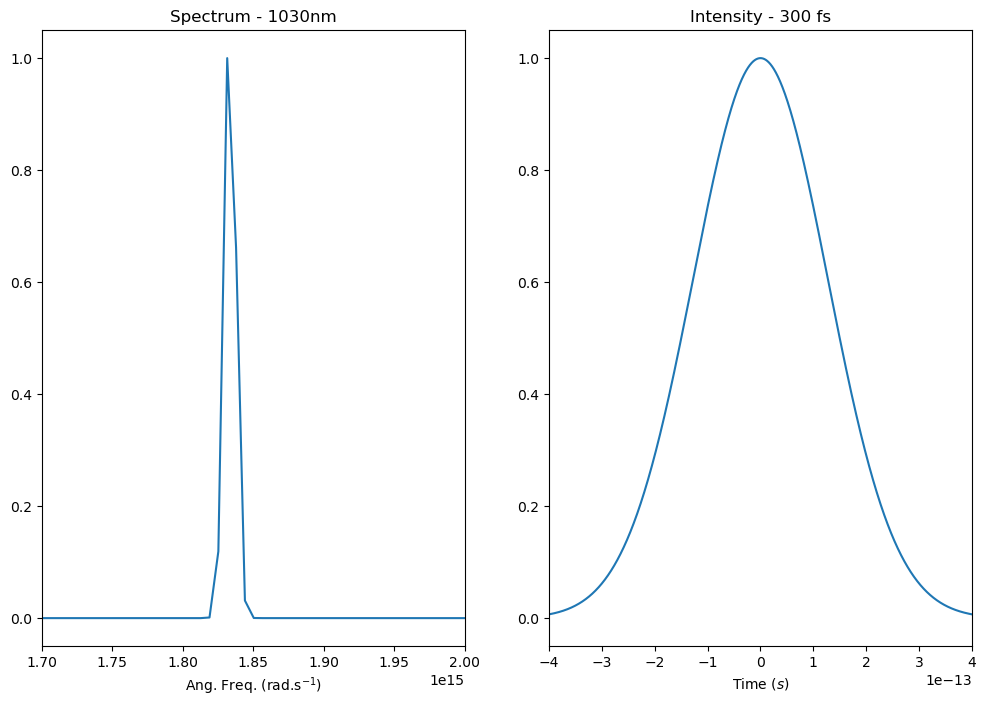

In [59]:
lambda0_300fs=1030e-9 #nm
#pulse central angular frequency
w0_300fs=2*pi*3e8/lambda0_300fs 
#duration in fs
duration_300fs=300e-15 

print(t)

I_t_300fs=calc_I_t(t,duration_300fs)

# Field at z=0
E_t_300fs_in=sqrt(I_t_300fs)*exp(-1j*w0_300fs*t)
E_w_300fs_in=IFT(E_t_300fs_in,Nbw)

figure('300 fs @ 1030 nm')
subplot(1,2,1)
plot(w,abs(E_w_300fs_in)**2.0/max(abs(E_w_300fs_in)**2))
xlim((1.7e15,2e15))
title('Spectrum - 1030nm')
xlabel('Ang. Freq. (rad.s$^{-1}$)')
subplot(1,2,2)
plot(t,abs(E_t_300fs_in)**2/max(abs(E_t_300fs_in)**2))
xlim((-400e-15,400e-15))
title('Intensity - 300 fs')
xlabel('Time ($s$)')

#### 3.3.2 Definition of a 25 fs pulse at 800 nm from Ti:Sa amplifier

Text(0.5, 0, 'Time ($s$)')

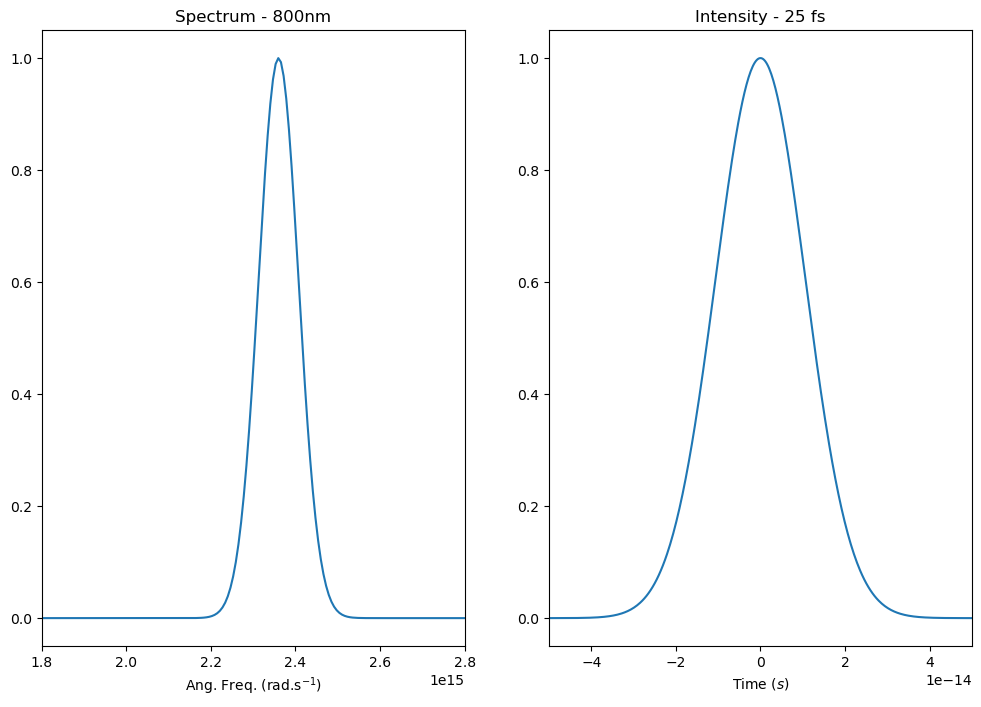

In [60]:
# pulse central wavelength
lambda0_25fs=800e-9 #nm
#pulse central angular frequency
w0_25fs=2*pi*3e8/lambda0_25fs 
#duration in fs
duration_25fs=25e-15 

I_t_25fs=calc_I_t(t,duration_25fs)

# Field at z=0
E_t_25fs_in=sqrt(I_t_25fs)*exp(-1j*w0_25fs*t)
E_w_25fs_in=IFT(E_t_25fs_in,Nbw)

figure('25 fs @800 nm')
subplot(1,2,1)
plot(w,abs(E_w_25fs_in)**2.0/max(abs(E_w_25fs_in)**2))
xlim((1.8e15,2.8e15))
title('Spectrum - 800nm')
xlabel('Ang. Freq. (rad.s$^{-1}$)')
subplot(1,2,2)
plot(t,abs(E_t_25fs_in)**2/max(abs(E_t_25fs_in)**2))
xlim((-50e-15,50e-15))
title('Intensity - 25 fs')
xlabel('Time ($s$)')

#### 3.3.2 Definition of a 5 fs postcompressed pulse at 700 nm

Text(0.5, 0, 'Time ($s$)')

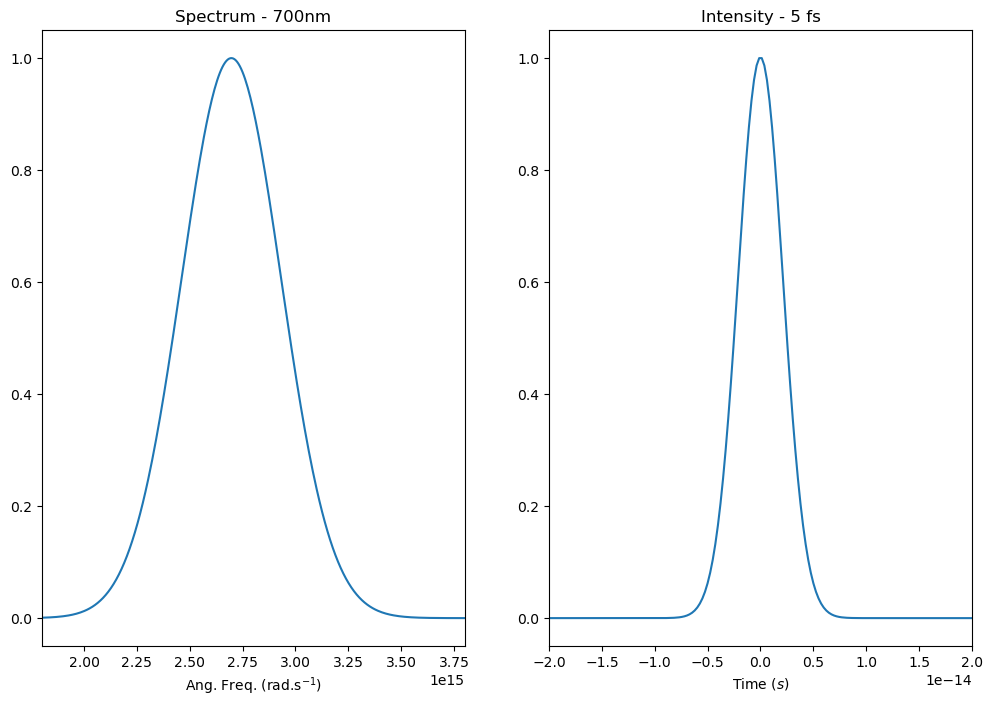

In [61]:
# pulse central wavelength
lambda0_5fs=700e-9 #nm
#pulse central angular frequency
w0_5fs=2*pi*3e8/lambda0_5fs 
#duration in fs
duration_5fs=5e-15 

I_t_5fs=calc_I_t(t,duration_5fs)

# Field at z=0
E_t_5fs_in=sqrt(I_t_5fs)*exp(-1j*w0_5fs*t)
E_w_5fs_in=IFT(E_t_5fs_in,Nbw)

figure('5 fs @ 700 nm')
subplot(1,2,1)
plot(w,abs(E_w_5fs_in)**2.0/max(abs(E_w_5fs_in)**2))
xlim((1.8e15,3.8e15))
title('Spectrum - 700nm')
xlabel('Ang. Freq. (rad.s$^{-1}$)')
subplot(1,2,2)
plot(t,abs(E_t_5fs_in)**2/max(abs(E_t_5fs_in)**2))
xlim((-20e-15,20e-15))
title('Intensity - 5 fs')
xlabel('Time ($s$)')

### 3.4 Propagation in air

#### 3.4.1 Propagation in 100 m of air of the 300 fs pulse

(290.0, 310.0)

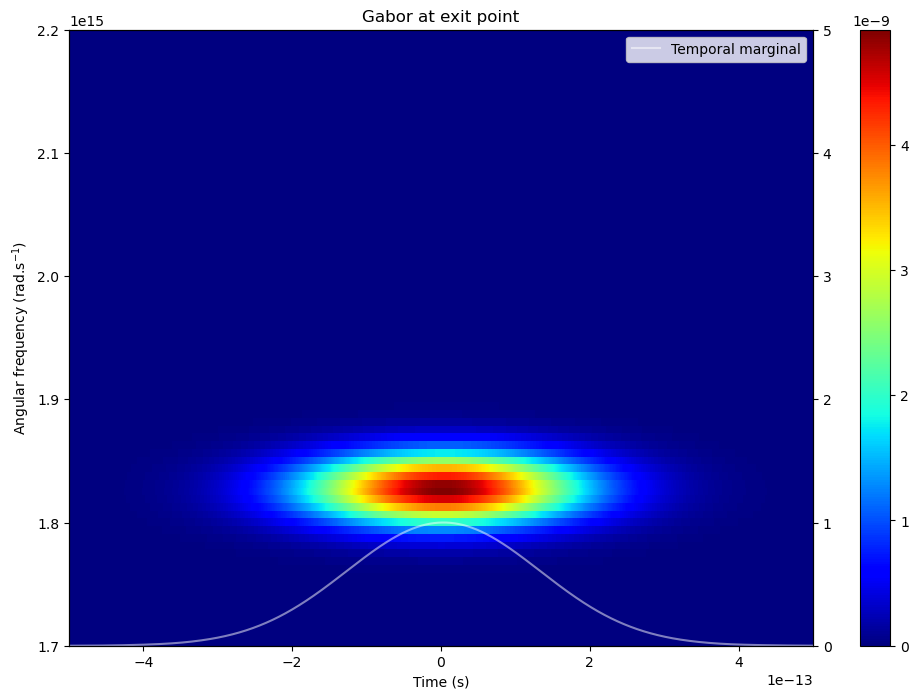

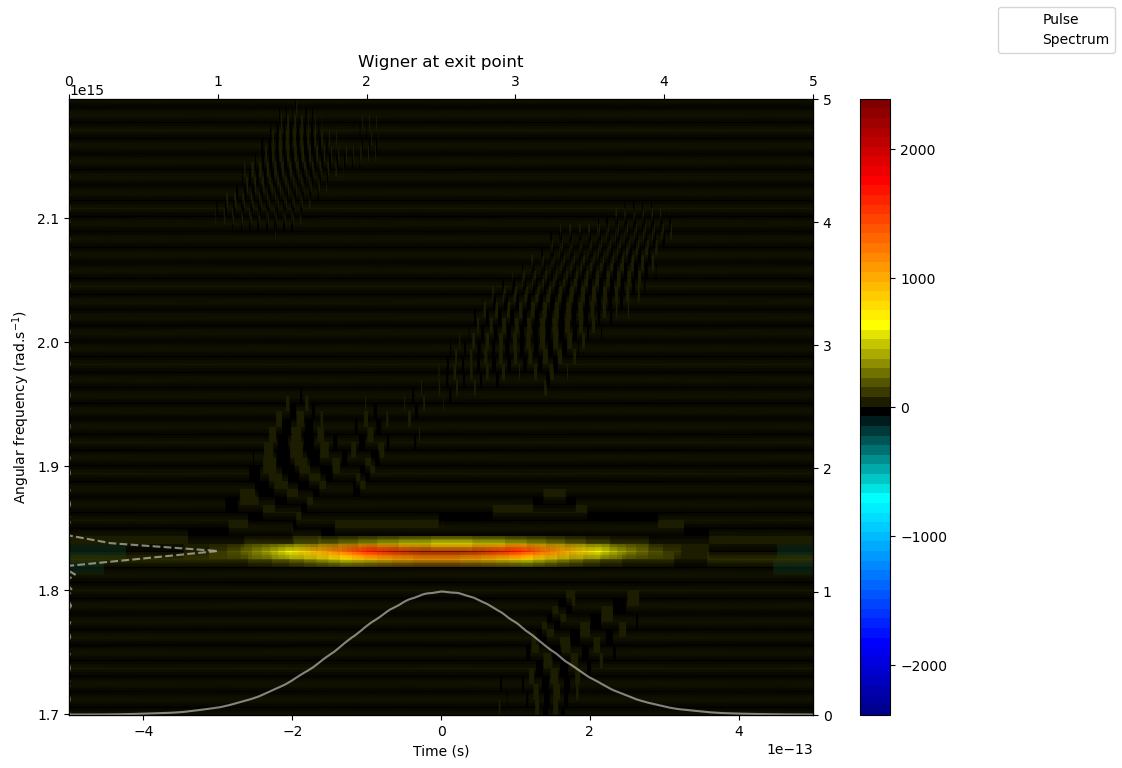

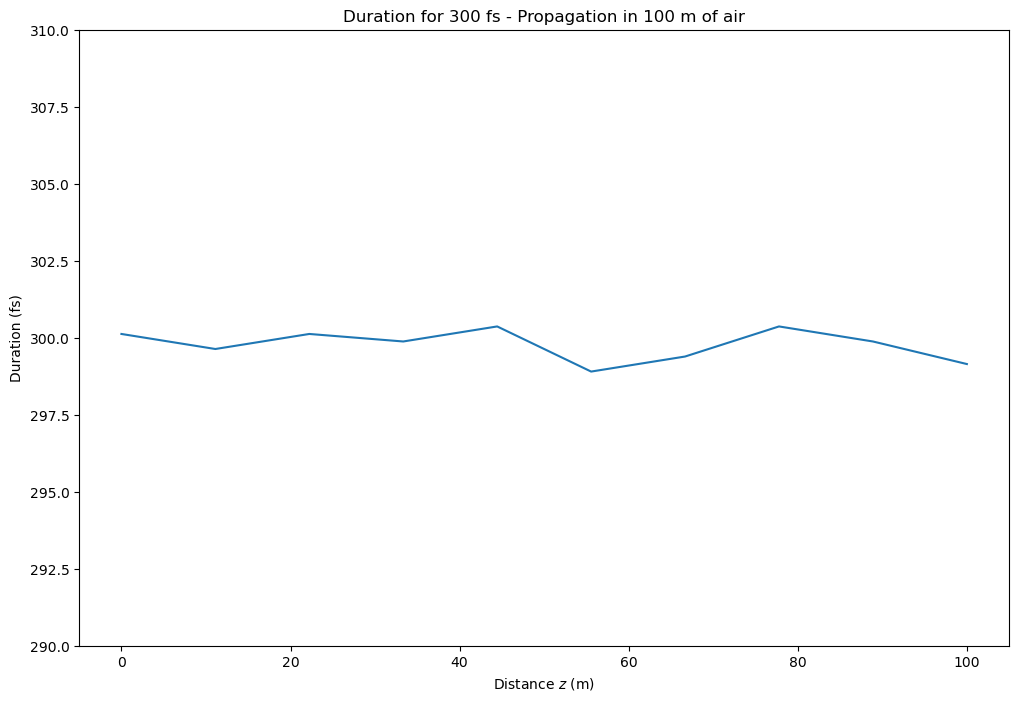

In [62]:
# Length of the medium
L=100

#Setting the limit for plotting
tmin=-5e-13
tmax=5e-13
wmin=1.7e15
wmax=2.2e15

medium='air'
NbPoints=10

FWHM,Z,E_t_z_air_300fs=propagation(t,w,E_w_300fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

# alpha parameter for Gabor transform
alpha=50e-15
#Sellmeyers formulaSellmeyers formula
# E_t_z_air[:,-1] corresponds to the last point i.e. the output of the medium

# Gabor transform
G=gabor(t,E_t_z_air_300fs[:,-1],Nbw,alpha)#this way of indexing access the last point of the array
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
WIG=wigner(E_t_z_air_300fs[:,-1],t,w)
plot_wigner(WIG,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

#Plot of the duration along z
figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_300fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((290,310))

<font color='red'><b>Conclusion</b></font> : No effect on the 300 fs pulse

#### 3.4.2 Propagation in 1 m of air of the 25 fs pulse

(10.0, 50.0)

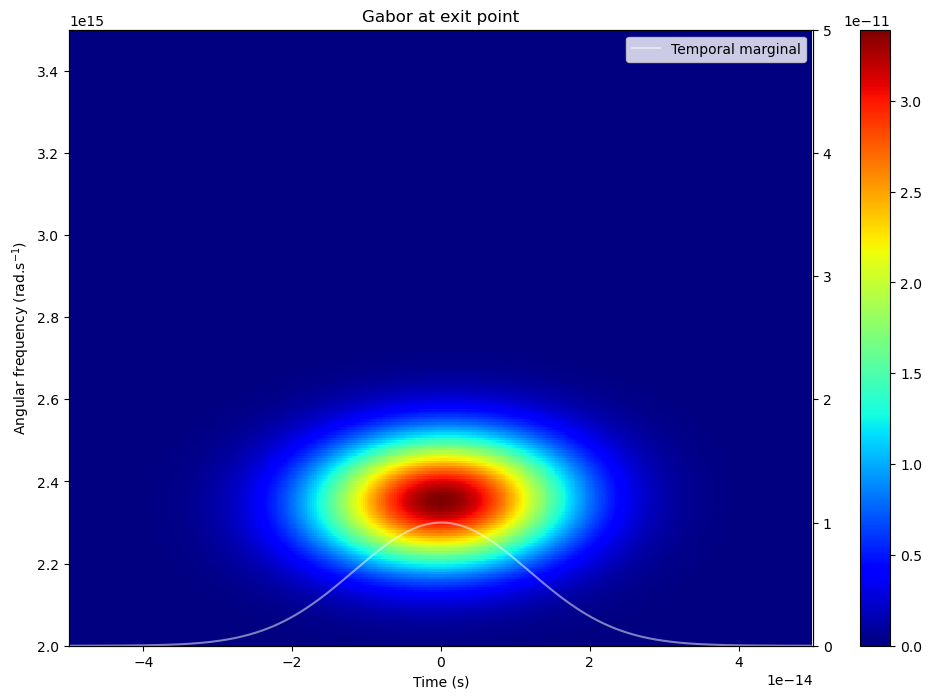

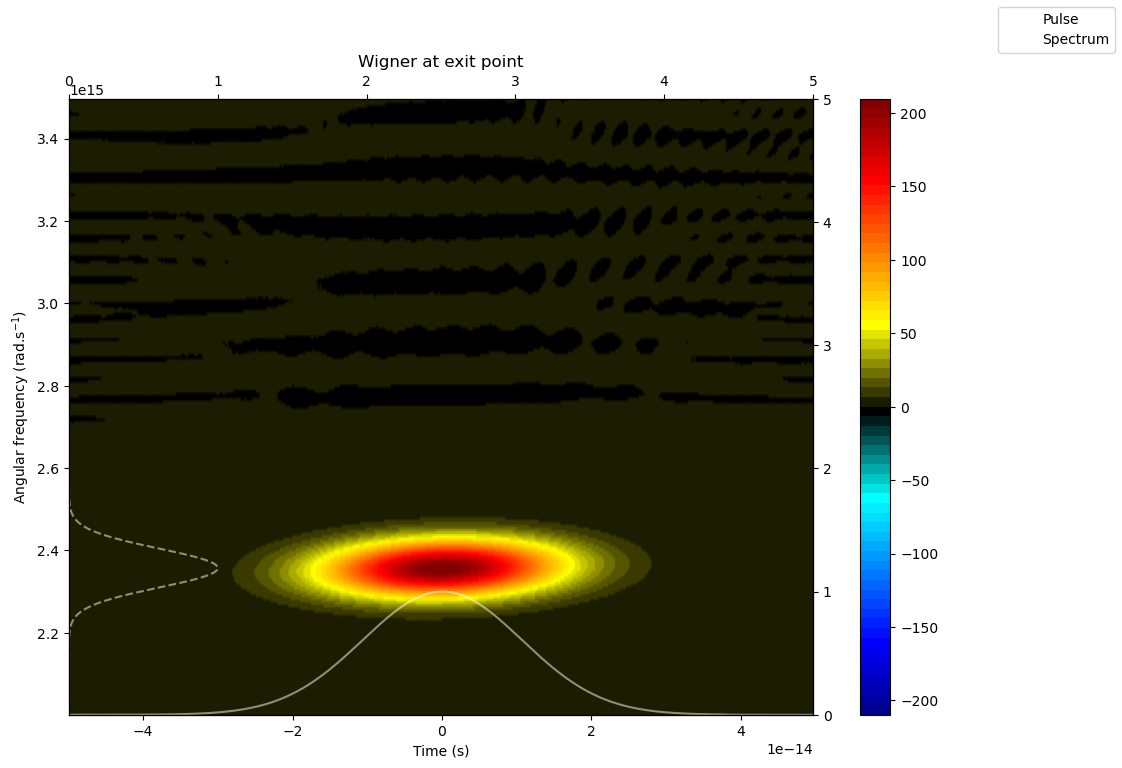

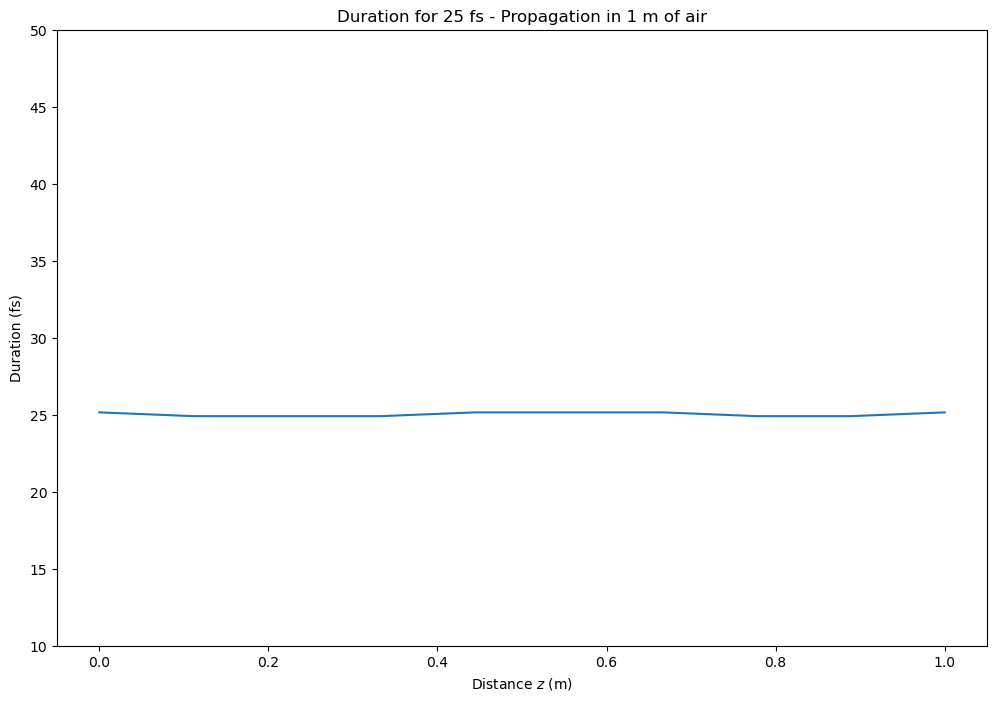

In [63]:
#Sellmeyers formulaSellmeyers formula# Length of the medium
L=1

#Setting the limit for plotting
tmin=-50e-15
tmax=50e-15
wmin=2e15
wmax=3.5e15

medium='air'
NbPoints=10

FWHM,Z,E_t_z_air_25fs_1m=propagation(t,w,E_w_25fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

#Setting the limit for plotting

# alpha parameter for Gabor transform
alpha=10e-15

# Gabor transform
G=gabor(t,E_t_z_air_25fs_1m[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
W=wigner(E_t_z_air_25fs_1m[:,-1],t,w)
plot_wigner(W,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_25fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((10,50))

#### 3.4.3 Propagation in 100 m of air of the 25 fs pulse

(10.0, 300.0)

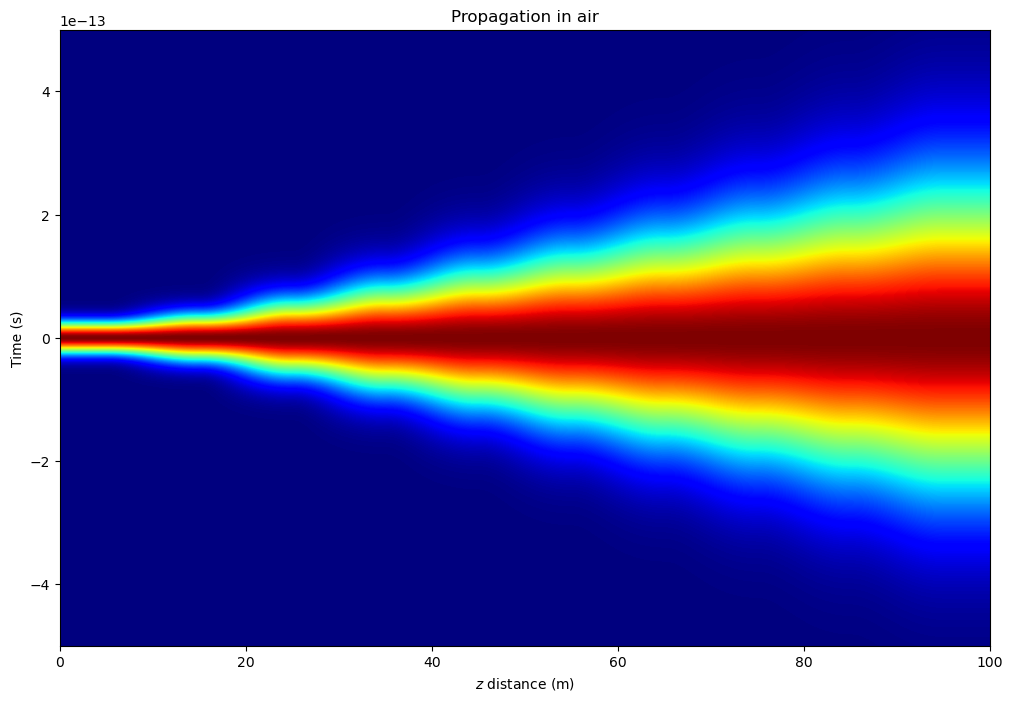

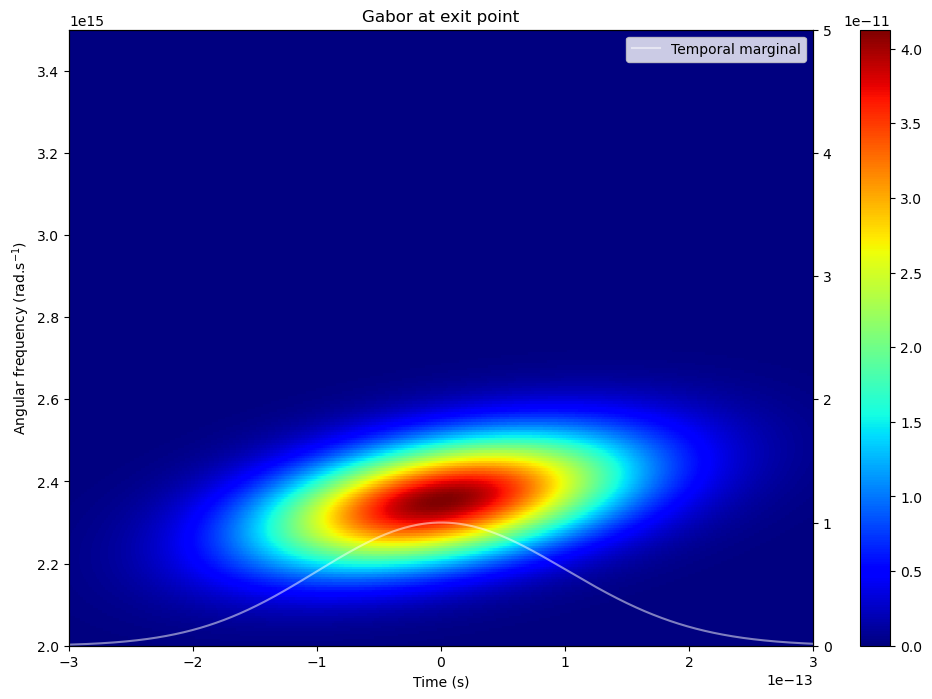

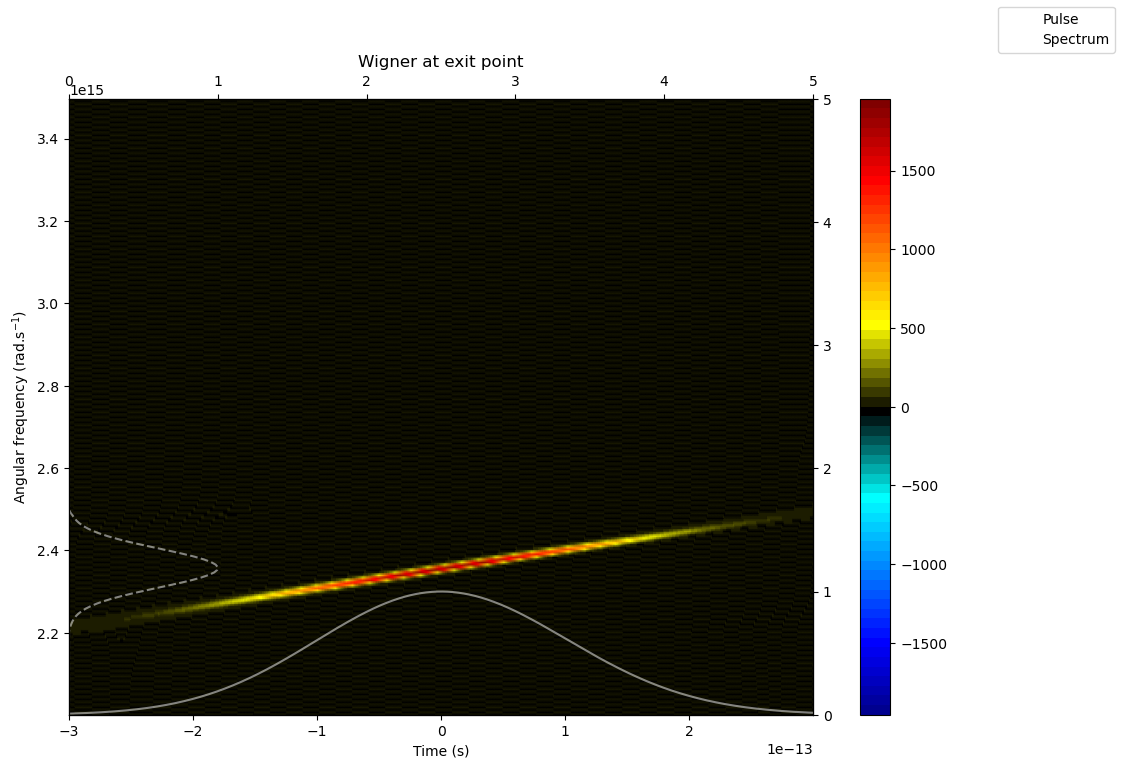

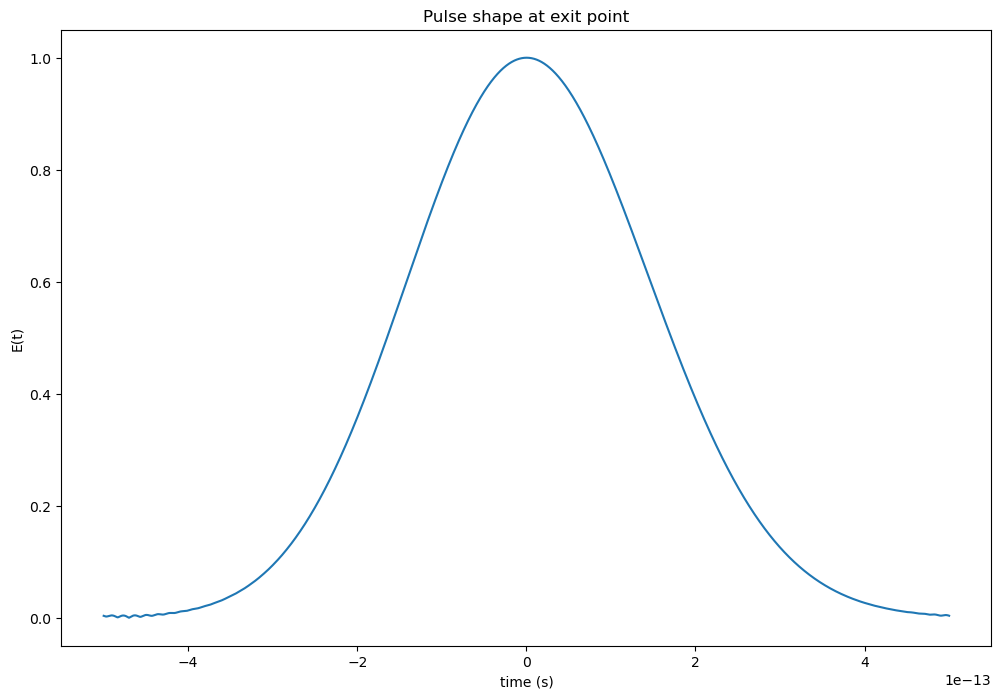

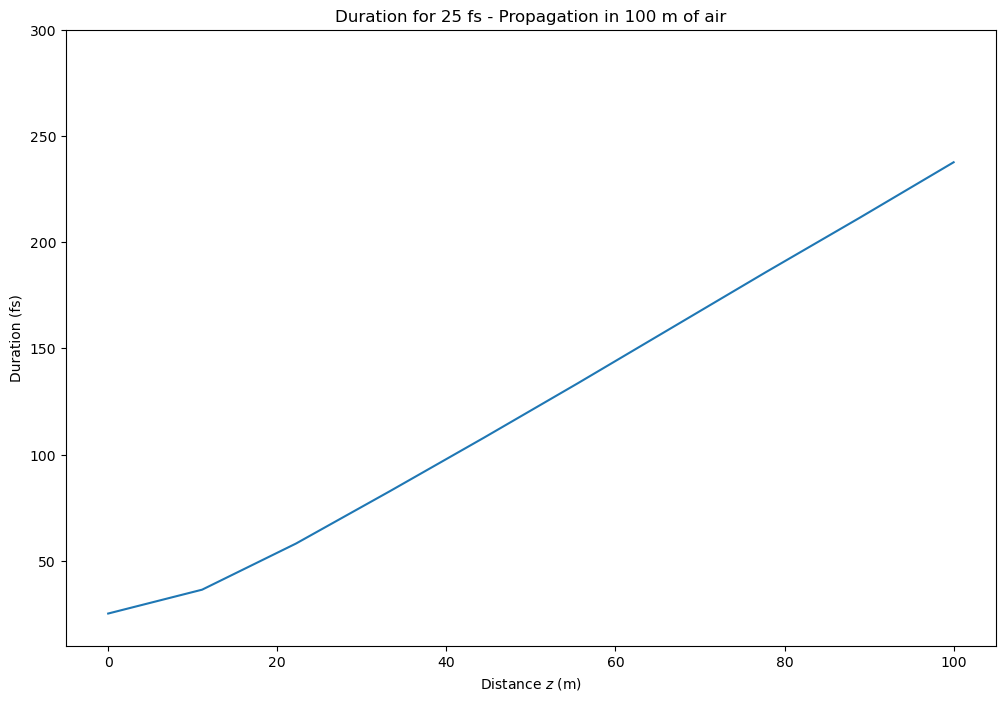

In [64]:
# Length of the medium
L=100

#Setting the limit for plotting
tmin=-3e-13
tmax=3e-13
wmin=2e15
wmax=3.5e15

medium='air'
NbPoints=10

FWHM,Z,E_t_z_air_25fs_100m=propagation(t,w,E_w_25fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=True) 

#Setting the limit for plotting

# alpha parameter for Gabor transform
alpha=10e-15

# Gabor transform
G=gabor(t,E_t_z_air_25fs_100m[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
W=wigner(E_t_z_air_25fs_100m[:,-1],t,w)
plot_wigner(W,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

# Signal at exit point

figure()
plot(t,abs(E_t_z_air_25fs_100m[:,-1]))
title('Pulse shape at exit point')
xlabel('time (s)')
ylabel('E(t)')
plot()


# Duration vs distance

figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_25fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((10,300))

#### 3.4.5 Propagation in 1 m of air of the 5 fs pulse
<div class="alert alert-block alert-info">
Show the effect on the duration of the propagation of a 5 fs postcompressed pulse in 1 m of air. Plot the 2D variation of the pulse envelop.
</div>

(0.0, 50.0)

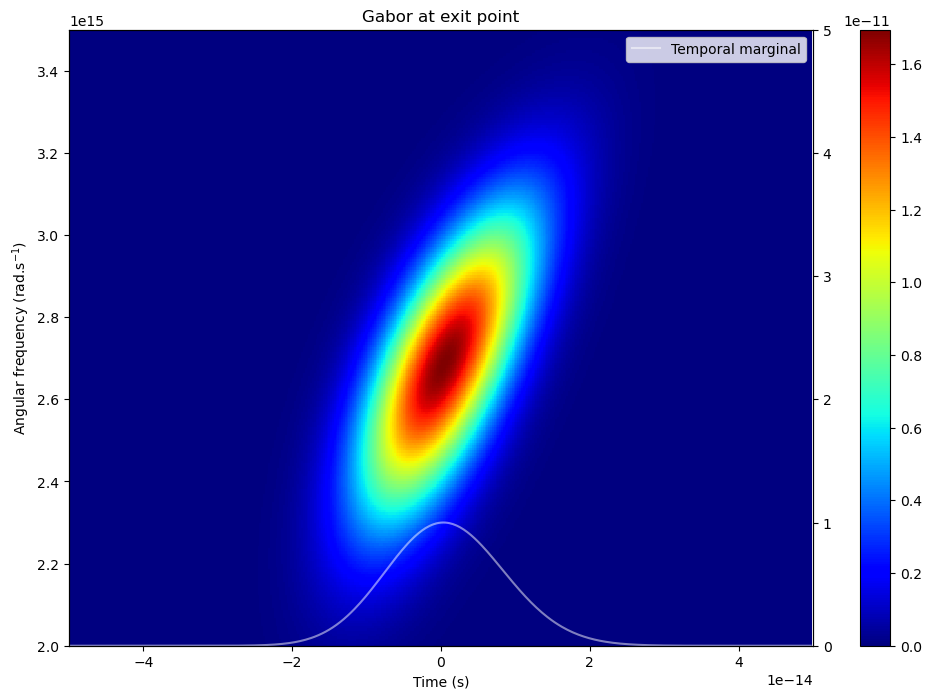

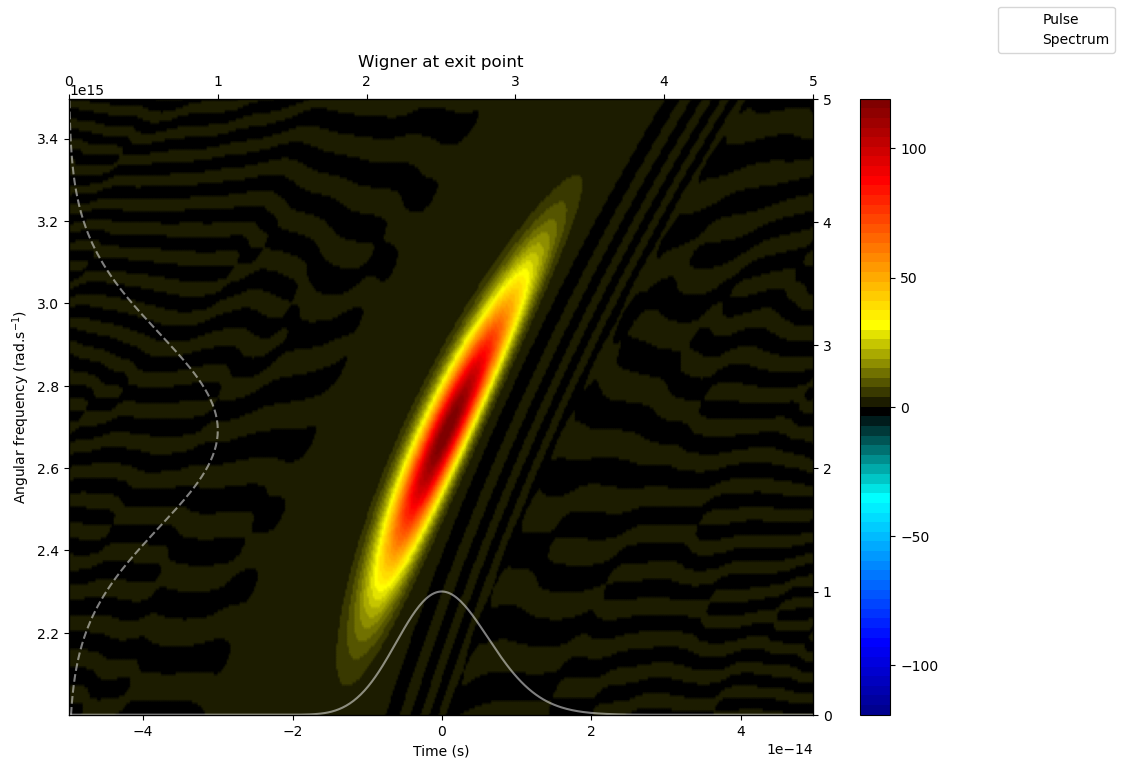

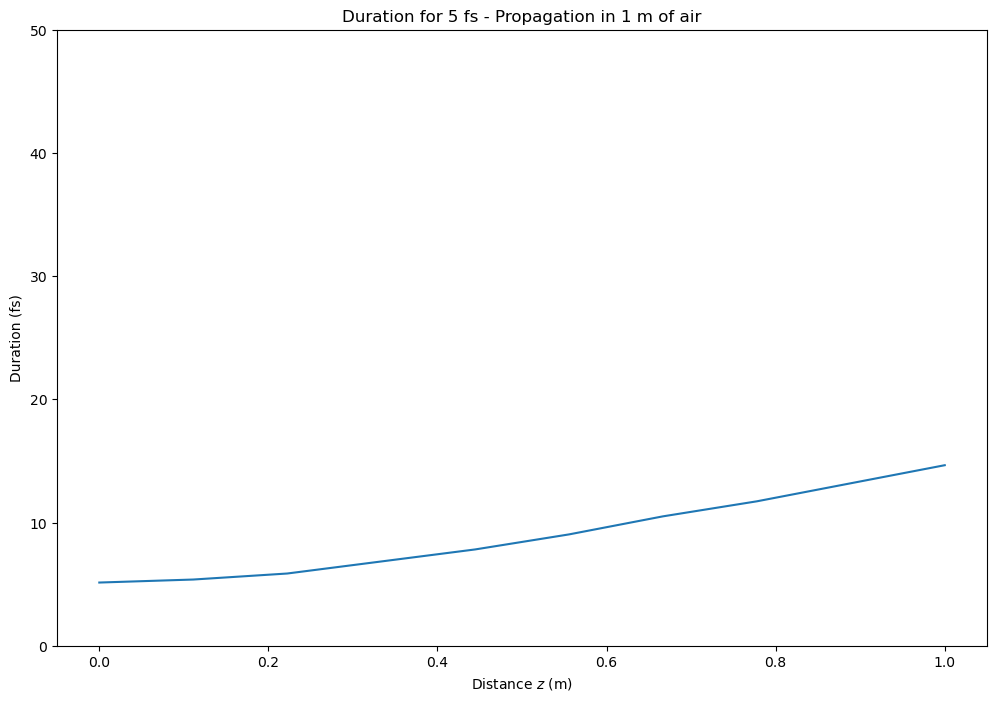

In [65]:
#Sellmeyers formulaSellmeyers formula# Length of the medium
L=1

#Setting the limit for plotting
tmin=-50e-15
tmax=50e-15
wmin=2e15
wmax=3.5e15

medium='air'
NbPoints=10

FWHM,Z,E_t_z_air_5fs_1m=propagation(t,w,E_w_5fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

#Setting the limit for plotting

# alpha parameter for Gabor transform
alpha=10e-15

# Gabor transform
G=gabor(t,E_t_z_air_5fs_1m[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
W=wigner(E_t_z_air_5fs_1m[:,-1],t,w)
plot_wigner(W,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_5fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((0,50))

### 3.5 Propagation in SiO$_2$

#### 3.5.1 Propagation of 300 fs pulse in 100 mm of SiO$_2$

(290.0, 310.0)

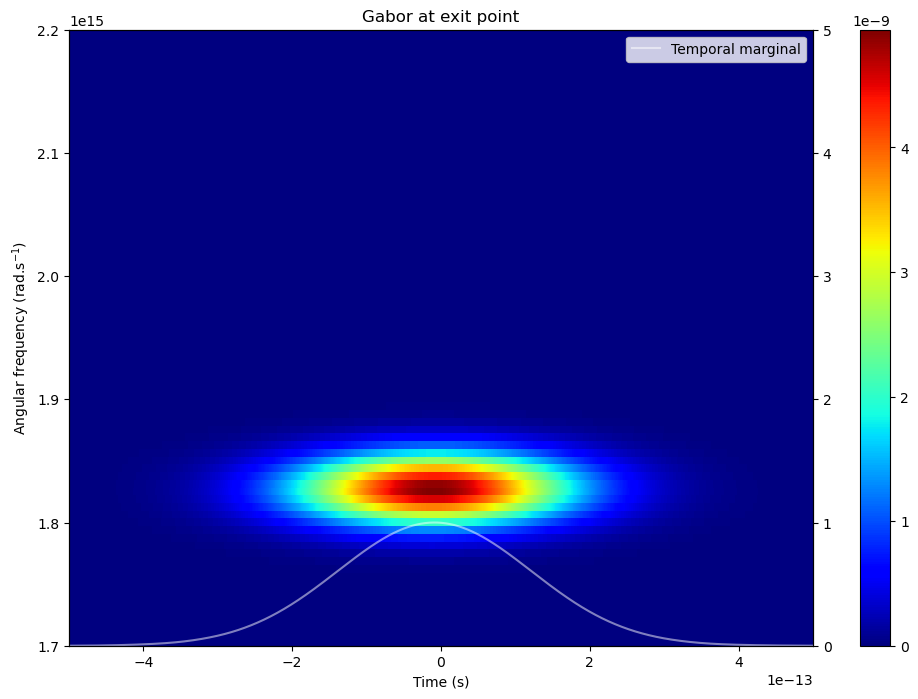

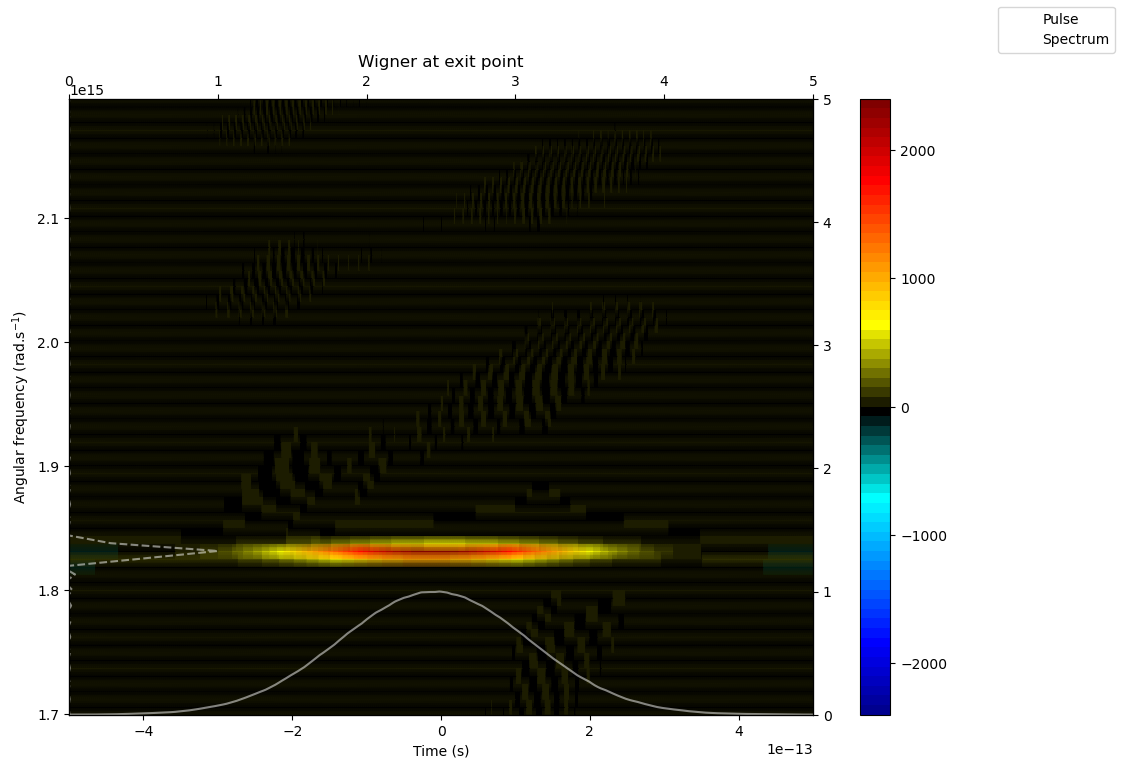

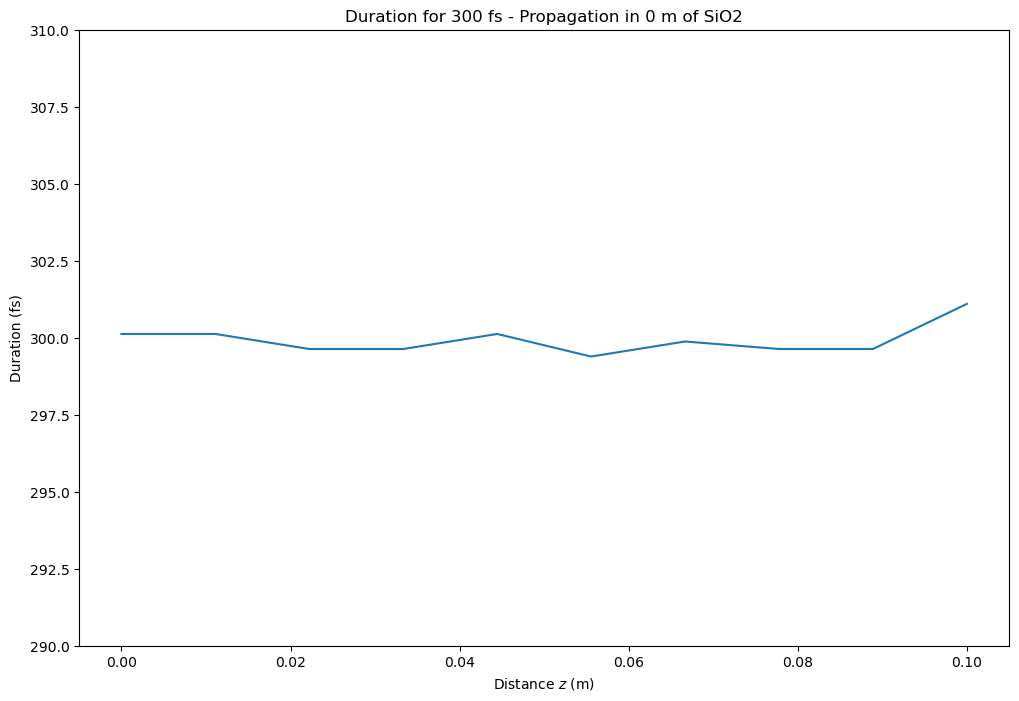

In [66]:
# Length of the medium
L=100e-3

#Setting the limit for plotting
tmin=-5e-13
tmax=5e-13
wmin=1.7e15
wmax=2.2e15

medium='SiO2'
NbPoints=10

FWHM,Z,E_t_z_sio2_300fs=propagation(t,w,E_w_300fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

# alpha parameter for Gabor transform
alpha=50e-15

# E_t_z_air[:,-1] corresponds to the last point i.e. the output of the medium

# Gabor transform
G=gabor(t,E_t_z_sio2_300fs[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
WIG=wigner(E_t_z_sio2_300fs[:,-1],t,w)
plot_wigner(WIG,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

#Plot of the duration along z
figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_300fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((290,310))

#### 3.5.2 Propagation in 5 mm of SiO$_2$ of the 25 fs pulse
<div class="alert alert-block alert-info">
Show the effect on the duration of the propagation of a 25 fs pulse in 5 mm of SiO$_2$.
</div>

#### 3.5.3 Propagation in 0.5 mm of SiO$_2$ of the 5 fs postcompressed pulse
<div class="alert alert-block alert-info">
Show the effect on the duration of the propagation of a 5 fs postcompressed pulse in 0.5 mm of SiO$_2$.
</div>

(0.0, 50.0)

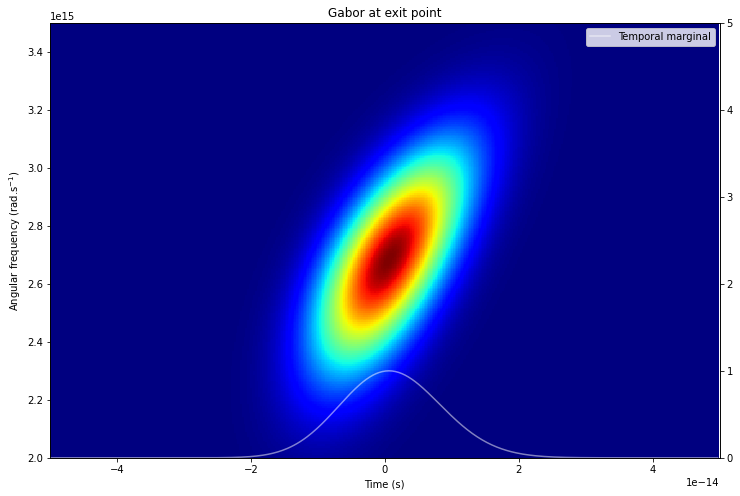

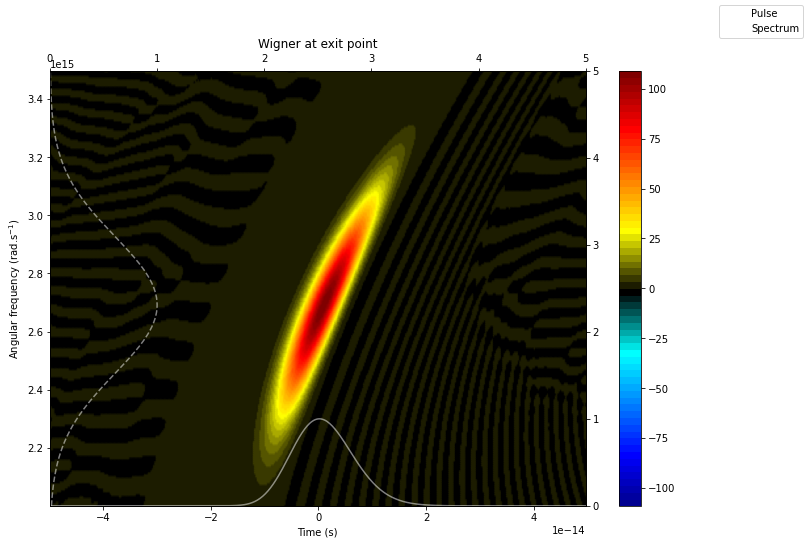

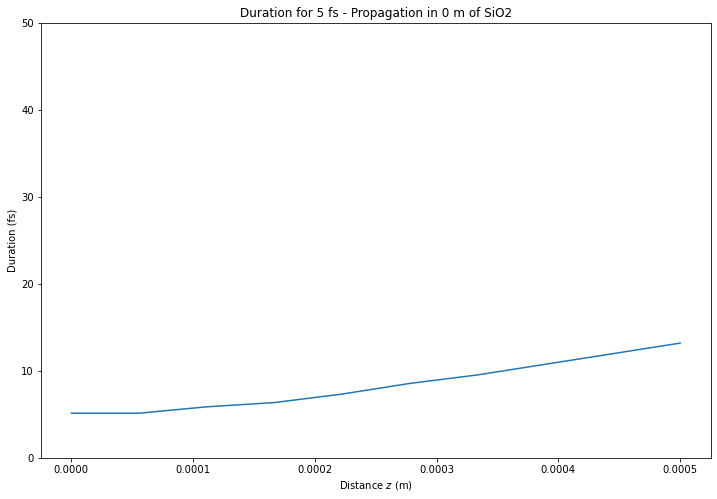

In [118]:
# Length of the medium
L=0.5e-3

#Setting the limit for plotting
tmin=-50e-15
tmax=50e-15
wmin=2e15
wmax=3.5e15

medium='SiO2'
NbPoints=10

FWHM,Z,E_t_z_FS_5fs_1m=propagation(t,w,E_w_5fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

#Setting the limit for plotting

# alpha parameter for Gabor transform
alpha=10e-15

# Gabor transform
G=gabor(t,E_t_z_FS_5fs_1m[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
W=wigner(E_t_z_FS_5fs_1m[:,-1],t,w)
plot_wigner(W,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.0f} m of {}'.format(duration_5fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((0,50))

### 3.6 Temporal broadening vs duration of the input pulse

#### 3.6.1 Propagation in 20 mm of SiO$_2$
Study of the temporal broadening of an input pulse at $\lambda_0 = 800$ nm during the propagation in 20 mm of SiO$_2$ :

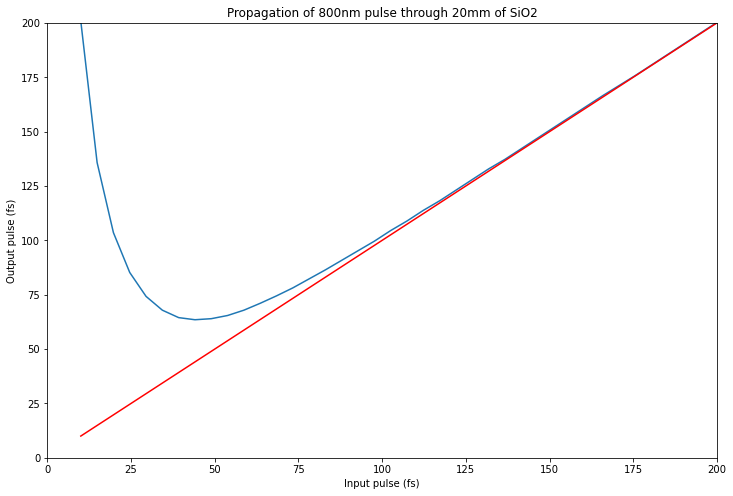

In [110]:
duration=linspace(10,200,40)
medium='SiO2'
fwhm=zeros(len(duration))
L=20e-3
for i,duree in enumerate(duration):
    duree=duree*1e-15
    # XX fs pulse @ 800nm
    # pulse central wavelength
    lambda0=800e-9 #nm
    #pulse central angular frequency
    w0=2*pi*3e8/lambda0 
    #duration in fs
    I_t=calc_I_t(t,duree)
    # Field at z=0
    E_t_in=sqrt(I_t)*exp(1j*w0*t)
    E_w_in=FT(E_t_in,Nbw)
    FWHM,Z,E_t_z=propagation(t,w,E_w_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False)
    fwhm[i]=FWHM[-1]
    
figure()
plot(duration,fwhm*1e15)
xlim((0,200))
ylim((0,200))
title('Propagation of 800nm pulse through 20mm of SiO2')
xlabel('Input pulse (fs)')
ylabel('Output pulse (fs)')
plot(duration,duration,'r-')

#### 3.6.2 Propagation in 20 mm of BK7
Study of the temporal broadening of an input pulse at $\lambda_0 = 800$ nm during the propagation in 20 mm of BK7 :

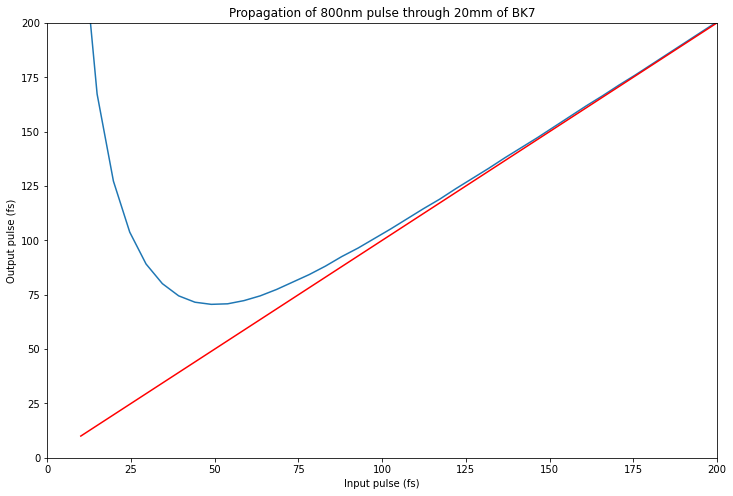

In [111]:
duration=linspace(10,200,40)
medium='bk7'
fwhm=zeros(len(duration))
L=20e-3
for i,duree in enumerate(duration):
    duree=duree*1e-15
    # XX fs pulse @ 800nm
    # pulse central wavelength
    lambda0=800e-9 #nm
    #pulse central angular frequency
    w0=2*pi*3e8/lambda0 
    #duration in fs
    I_t=calc_I_t(t,duree)
    # Field at z=0
    E_t_in=sqrt(I_t)*exp(1j*w0*t)
    E_w_in=FT(E_t_in,Nbw)
    FWHM,Z,E_t_z=propagation(t,w,E_w_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False)
    fwhm[i]=FWHM[-1]
    
figure()
plot(duration,fwhm*1e15)
xlim((0,200))
ylim((0,200))
title('Propagation of 800nm pulse through 20mm of BK7')
xlabel('Input pulse (fs)')
ylabel('Output pulse (fs)')
plot(duration,duration,'r-')

Conclusion : We observe an optimum point, where the pulse undergo minimal dipersion.

#### 3.6.3 Propagation in 20 mm of SF10
<div class="alert alert-block alert-info">
1) Define in the function <code>refractive_index</code> the coefficients correponding to SF10 material using [refractiveindex.info](/https://refractiveindex.info/)
    
2) Study of the temporal broadening of an input pulse at $\lambda_0 = 800$ nm during the propagation in 20 mm of SF10
</div>

In [199]:
def refractive_index(Lambda,medium='air'):
    """
    Parameters
    ----------
    Lambda : float
        wavelength in microns
    medium : string, optional
        medium The default is 'air'.

    Returns
    -------
    refractive index with respect to Seilmeier formula:
        n**2(Lambda)= 1 + B1*Lambda**2/(Lambda**2-C1)+B2*Lambda**2/(Lambda**2-C2) \
            + B3*Lambda**2/(Lambda**2-C3)

    """
    def sellmeier(Lambda,B1,C1,B2,C2,B3,C3):
        return sqrt(1+B1*Lambda**2.0/(Lambda**2-C1)+B2*Lambda**2.0/(Lambda**2-C2)+B3*Lambda**2.0/(Lambda**2-C3))
    
    if medium=='air':
        B1=0.05792105
        C1=238.0185
        B2=0.00167917
        C2=57.362
        n=1+B1/(C1-Lambda**(-2))+B2/(C2-Lambda**(-2))
        return n
    elif medium=='SiO2':
        B1=0.6961663
        C1=0.0684043**2
        B2=0.4079426
        C2=0.1162414**2
        B3=0.8974794
        C3=9.896161**2
        return sellmeier(Lambda,B1,C1,B2,C2,B3,C3)
    elif medium=='bk7':
        B1=1.03961212
        C1=0.00600069867
        B2=0.231792344
        C2=0.0200179144
        B3=1.01046945
        C3=103.560653
        return sellmeier(Lambda,B1,C1,B2,C2,B3,C3)
    elif medium=='sf10':
        B1=1.62153902
        C1=0.0122241457
        B2=0.256287842
        C2=0.0595736775
        B3=1.64447552
        C3=147.468793
        return sellmeier(Lambda,B1,C1,B2,C2,B3,C3)
    else:
        print('Sorry, this medium is not yet defined. For the moment only air, SiO2 and bk7 are present')

Now calculate the propagration in 20 mm sf10

Too many points, 1D plots won't be rendered


(10.0, 300.0)

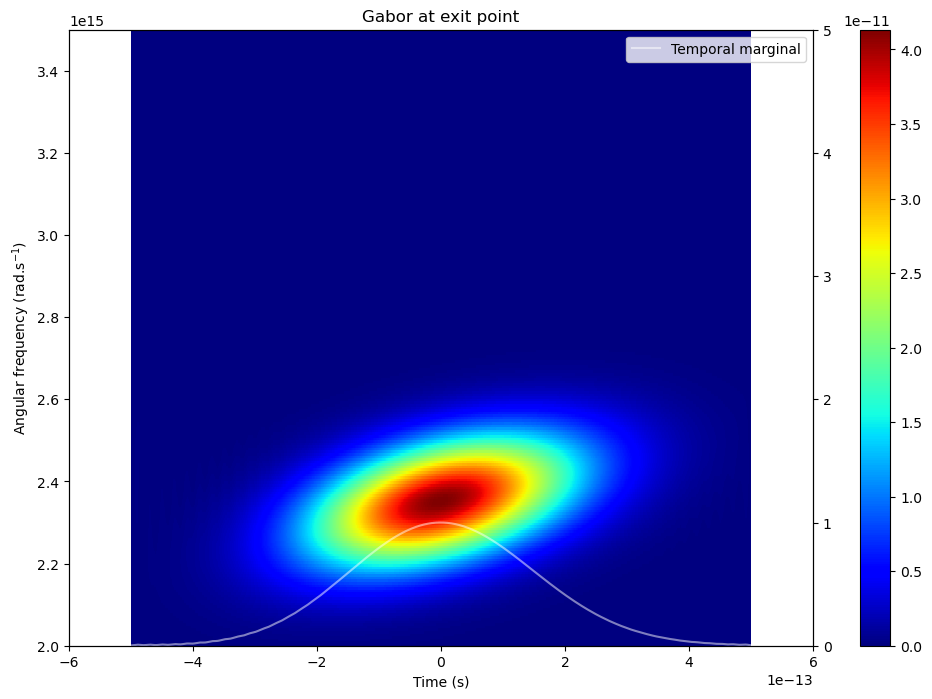

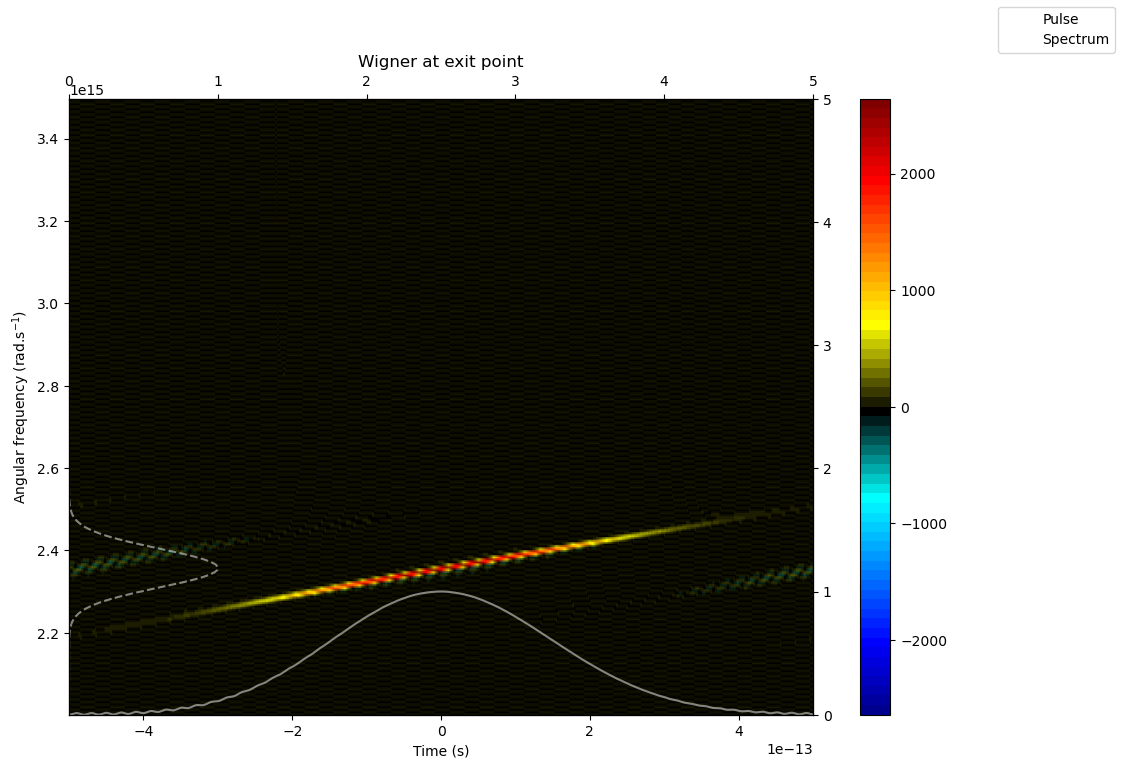

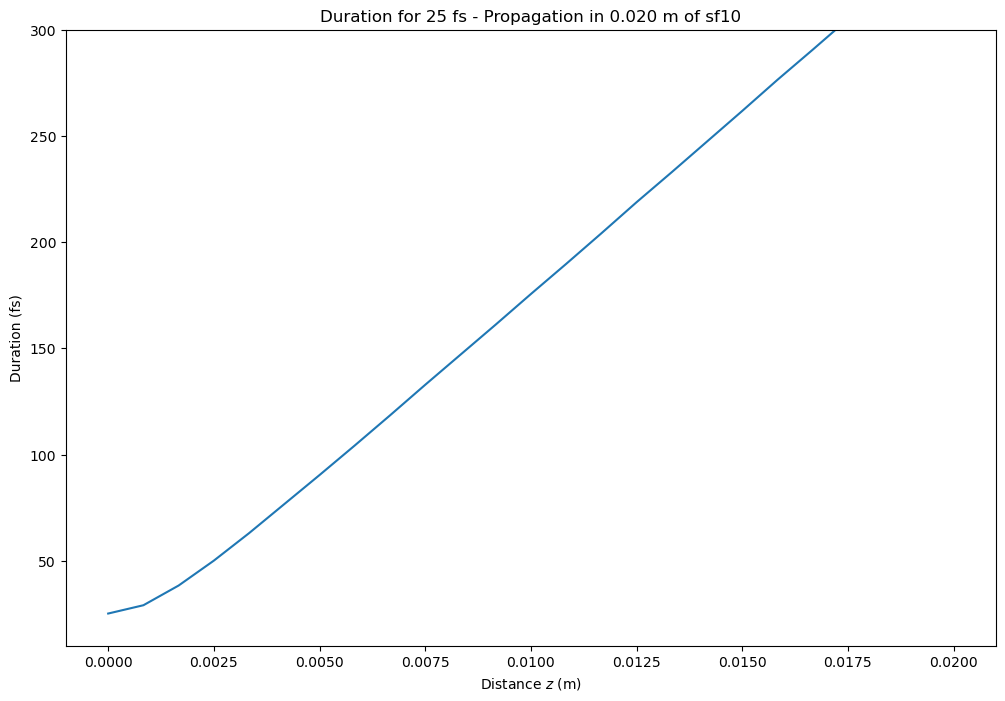

In [200]:
# Length of the medium
L=20e-3#lenght in meters

#Setting the limit for plotting
tmin=-6e-13
tmax=6e-13
wmin=2e15
wmax=3.5e15

medium='sf10'
NbPoints=25

FWHM,Z,E_t_z_sf10_25fs_100m=propagation(t,w,E_w_25fs_in,L,NbPoints,tmin,tmax,medium,plot1D=False,plot2D=False) 

#Setting the limit for plotting

# alpha parameter for Gabor transform
alpha=10e-15

# Gabor transform
G=gabor(t,E_t_z_sf10_25fs_100m[:,-1],Nbw,alpha)
plot_gabor(G,t,w,tmin,tmax,wmin,wmax,'Gabor at exit point')
# Wigner distribution
W=wigner(E_t_z_sf10_25fs_100m[:,-1],t,w)
plot_wigner(W,t,w,tmin,tmax,wmin,wmax,'Wigner at exit point')

figure()
plot(Z,FWHM*1e15)
title('Duration for {:.0f} fs - Propagation in {:.3f} m of {}'.format(duration_25fs*1e15,L,medium))
xlabel('Distance $z$ (m)')
ylabel('Duration (fs)')
ylim((10,300))

***
## 4. Compensation of dispersion

### 4.1 Principle

The following function can be defined to compensate the effect of dispersion by introducing a quadratic spectral phase: 

In a real set-up, $\alpha$ is tuned using the prisms angle and the inter-prism distance, so that the overall pulse duration is minimized.

In [69]:
def dispersion_compensation(t,w,w0,E_w_ft,delta_alpha,NbSteps,length,medium,tmin,tmax,plot1D=False):
    ALPHA=zeros(NbSteps)
    E_t_out=zeros((len(t),NbSteps),dtype=complex)
    FWHM=zeros(NbSteps)
    Nbt=len(t)
    for step in range(NbSteps):
        alpha=-float(step*delta_alpha)
        #print(alpha)
        E_t_ft=FT(E_w_ft,Nbt)
        # Pulse before medium
        #Adding a quadratic phase - compressor setting
        E_w_in=E_w_ft*exp(1j*alpha*(w-w0)**2)
        #E_t_in=fftshift(fft(fftshift(E_w_in)))
        E_t_in=FT(E_w_in,Nbt)
        E_t_in=E_t_in/max(abs(E_t_in))
        
        
        #temporal phase of input pulse
        phi_t_in=unwrap(angle(E_t_in)) 
        phi_t_in=phi_t_in-polyval(polyfit(t[2060:3060],phi_t_in[2060:3060],1),t)
        
        fwhm,Z,E_t_z_out=propagation(t,w,E_w_in,length,2,tmin,tmax,medium,plot1D=False,plot2D=False) 
        
        FWHM[step]=fwhm[-1]
        E_t_out[:,step]=E_t_z_out[:,-1]
        ALPHA[step]=alpha
        
         #temporal phase of input pulse
        phi_t_out=unwrap(angle(E_t_out[:,step])) 
        phi_t_out=phi_t_out-polyval(polyfit(t[2060:3060],phi_t_out[2060:3060],1),t)
        
        if plot1D==True:
            figure()
            ax1=subplot(1,1,1)
            ax1.plot(t,abs(E_t_out[:,step])**2.0/max(abs(E_t_out[:,step])**2.0),label='Output pulse')
            ax1.plot(t,abs(E_t_in)**2.0/max(abs(E_t_in)**2.0),'r',label='Input pulse')
            ax1.fill_between(t, 0,abs(E_t_ft)**2/max(abs(E_t_ft)**2) ,alpha=0.3,label='FT limited')
            #ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
            ax1.text(0.8*tmin,0.4,"$\\alpha$ ={:2.1f} fs$^2$".format(-alpha*1e30))
            ax1.set_xlim([tmin,tmax])
            ax11 = ax1.twinx()
            ax11.plot(t,phi_t_out,'--b')
            ax11.plot(t,phi_t_in,'--r')
            ax11.set_ylim([-10,10])
            ax1.legend()
            title('Propagation in {:.1e} m of {}'.format(length,medium))
        
    return FWHM,ALPHA,E_t_out

### 4.2 Propagation of a post-compensated 25 fs pulse in 10mm of SiO$_2$

0

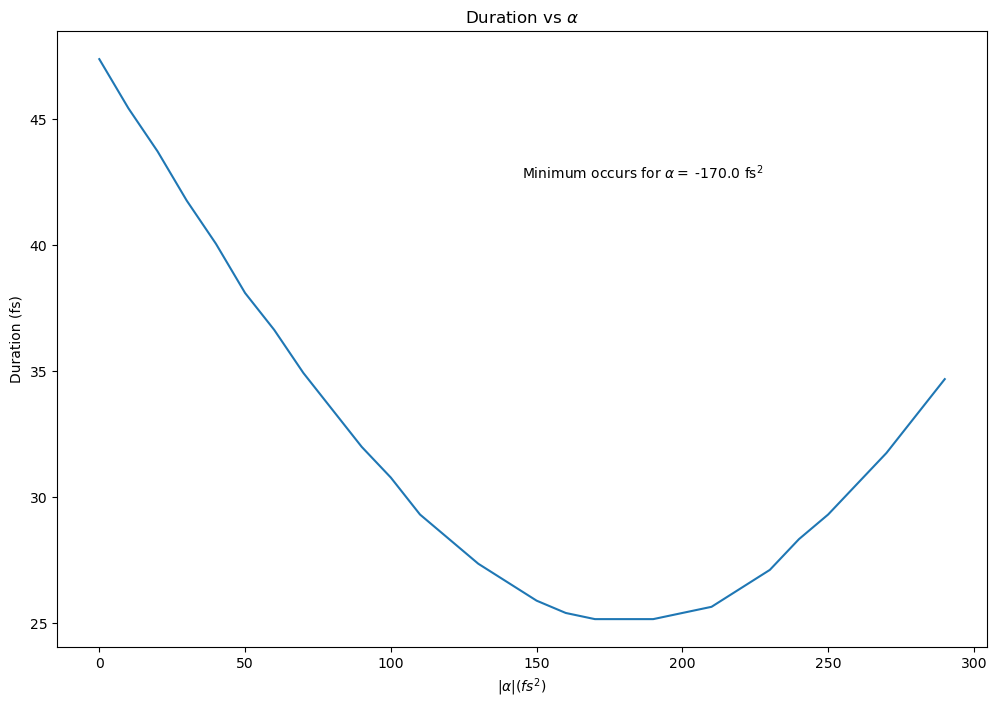

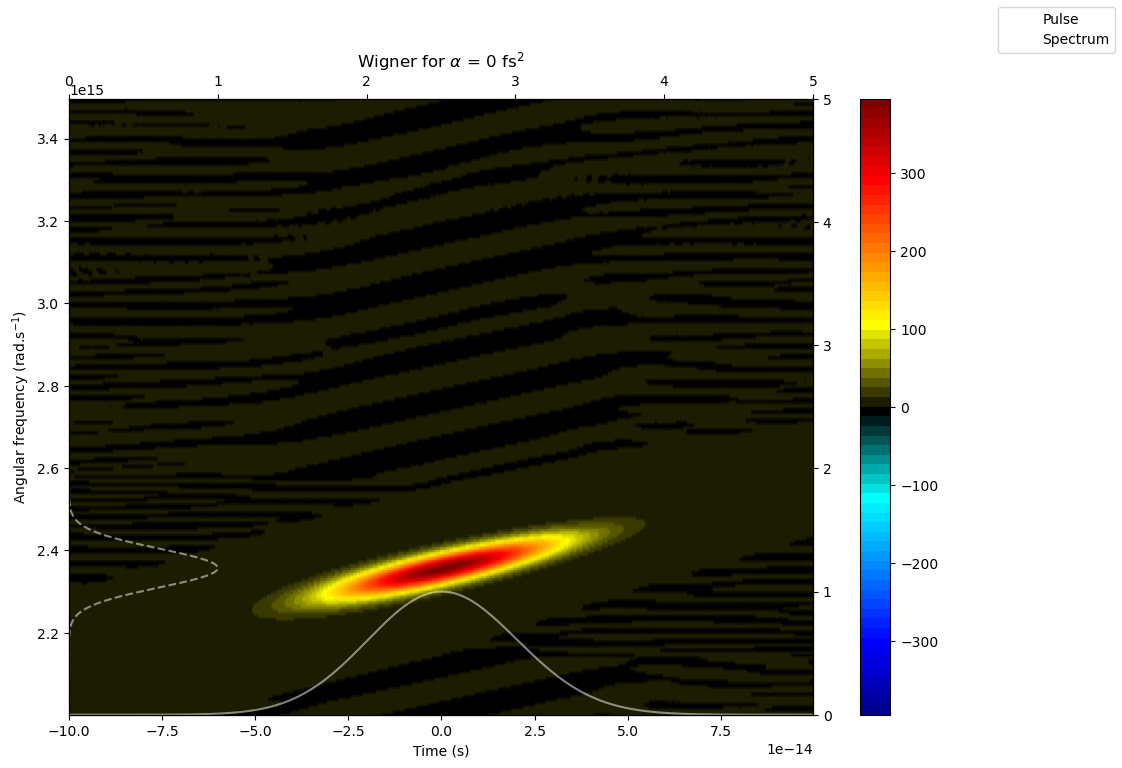

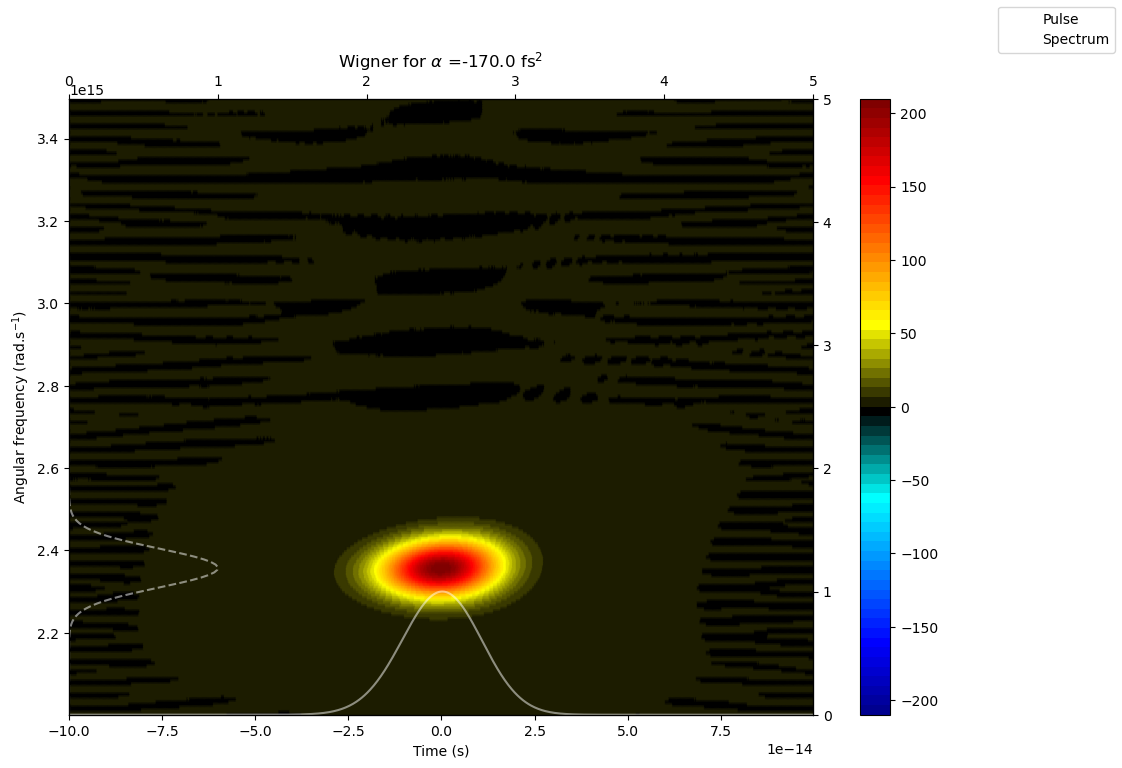

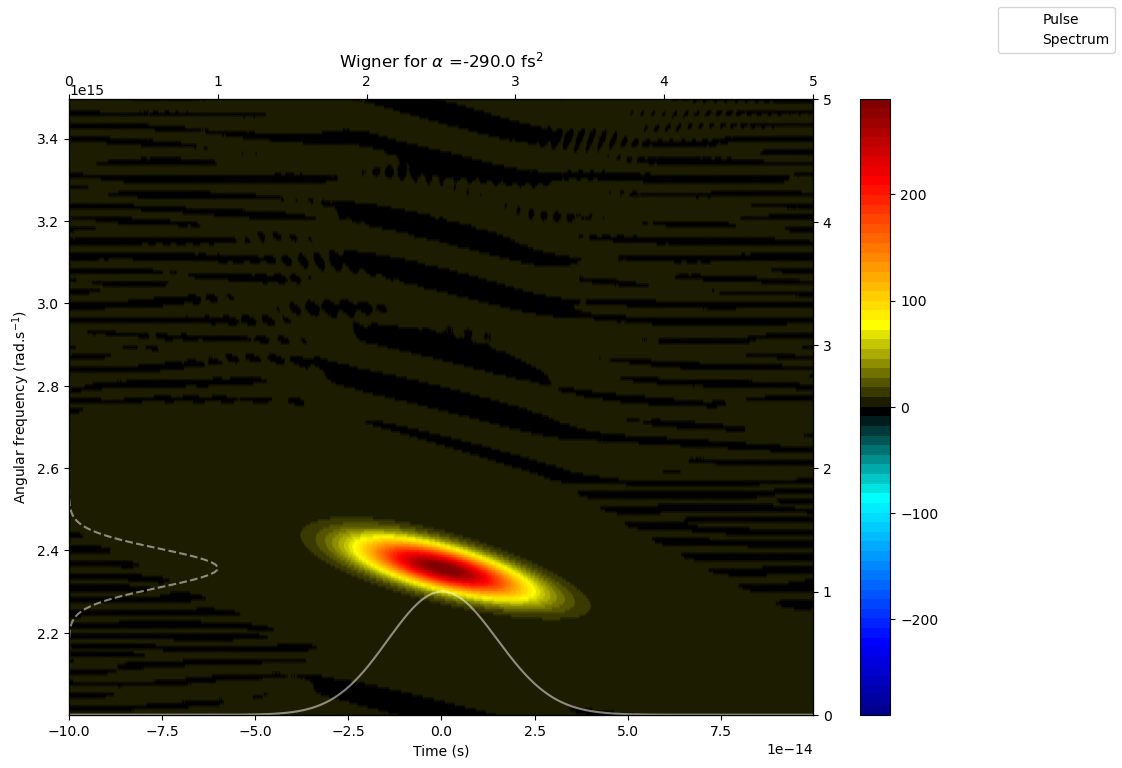

In [70]:
#Distance of propagation
L=10e-3

#Setting the limit for plotting
tmin=-100e-15
tmax=100e-15
wmin=2e15
wmax=3.5e15

medium='SiO2'
duration=25e-15

#Step for adding quadratic phase
delta_alpha=10*(1e-15)**2 
NbSteps=30

# 25 fs pulse @ 800nm
# pulse central wavelength
lambda0=800e-9 #nm
#pulse central angular frequency
w0=2*pi*3e8/lambda0 
#duration in fs
duration=25e-15 

I_t_25fs=calc_I_t(t,duration)

# Field at z=0
E_t_25fs_FT=sqrt(I_t_25fs)*exp(-1j*w0*t)
E_w_25fs_FT=IFT(E_t_25fs_FT,Nbw)


FWHM_25fs,ALPHA_25fs,E_t_25fs_out=dispersion_compensation(t,w,w0,\
                                                          E_w_25fs_FT,delta_alpha,NbSteps,L,medium,tmin,tmax)



figure()
plot(-ALPHA_25fs*1e30,FWHM_25fs*1e15)
title('Duration vs $\\alpha$')
xlabel('$|\\alpha| (fs^{2})$')
ylabel('Duration (fs)')

ind_min=FWHM_25fs.argmin()

text(max(abs(ALPHA_25fs*1e30))/2, 0.9*max(FWHM_25fs*1e15)\
     ,'Minimum occurs for $\\alpha =$ {:.1f} fs$^2$'.format(ALPHA_25fs[ind_min]*1e30))



W0=wigner(E_t_25fs_out[:,0],t,w)
plot_wigner(W0,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ = 0 fs$^2$ ')

# find the index which corresponds to the minimum duration


Wopt=wigner(E_t_25fs_out[:,ind_min],t,w)
plot_wigner(Wopt,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ ={:.1f} fs$^2$'.format(ALPHA_25fs[ind_min]*1e30))
            
Wfin=wigner(E_t_25fs_out[:,-1],t,w)
plot_wigner(Wfin,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ ={:.1f} fs$^2$'.format(ALPHA_25fs[-1]*1e30))

***
## 5. Self Phase Modulation (SPM)

### 5.1 Influence of a temporal gaussian phase

#### 5.1.1 Function to add sequentially a temporal Gaussian phase


In [207]:
def gaussian_phase(t,w,w0,E_t_in,delta_sigma,NbSteps,tmin,tmax,plot1D=False):
    E_t_out=zeros((len(t),NbSteps),dtype=complex)
    E_w_out=zeros((len(w),NbSteps),dtype=complex)
    phi_t_out=zeros((len(t),NbSteps))
    SIGMA=zeros(NbSteps)
    #FWHM=zeros(NbSteps)
    Nbw=len(w)
    for step in range(NbSteps):
        sigma=float(step*delta_sigma)
        
        
        SIGMA[step]=sigma
        
        # Add a gaussian phase to the temporal field
        I_t_in=abs(E_t_in)**2.0
        #E_w_in=IFT(sqrt(I_t_in)*exp(-1j*w0*t))
        E_w_in=IFT(E_t_in,Nbw)
        
        phi_t_out[:,step]=sigma*I_t_in
        
        
        
        # Field after adding the phase
        E_t_out[:,step]=E_t_in*exp(1j*phi_t_out[:,step])
        E_w_out[:,step]=IFT(E_t_out[:,step],Nbw)
        #E_w_out[:,step]=E_w_out[:,step]/amax(abs(E_w_out[:,step])**2.0)
        
        #FWHM[step]=calcFWHM(t,abs(E_t_out[:,step])**2.0)
        
        if plot1D==True:
            fig, (ax1,ax2) = subplots(2,1)
            ax1.plot(t*1e15,abs(E_t_out[:,step])**2/amax(abs(E_t_out[:,step])**2),'r',label='Pulse with Gaussian phase')
            ax1.fill_between(t*1e15, 0,abs(E_t_in)**2/amax(abs(E_t_in)**2) ,alpha=0.3,label='FT limited')
            ax1.set_xlim([tmin*1e15,tmax*1e15])
            ax1.set_xlabel('Time (fs)')
            ax1.set_ylabel('Intensity')
            ax1.text(0.8*tmin*1e15,0.6,'$\\sigma$ = {:.1e}'.format(sigma))
            ax11 = ax1.twinx()
            ax11.plot(t*1e15,phi_t_out[:,step],'--r',label='Gaussian phase')
            ax11.set_ylabel('Phase (rad)')
            ax11.set_ylim([-1,10])
            ax1.legend()
        
            ax2.plot(w*1e-15,abs(E_w_out[:,step])**2,'r',label='Modified spectrum by SPM')
            ax2.fill_between(w*1e-15, 0,abs(E_w_in)**2 ,alpha=0.3,label='Initial spectrum')
            ax2.set_xlim([1.5,3.5])
            ax2.set_ylabel('Intensity')
            ax2.set_xlabel('Angular frequency (x1e15 rad/s)')
            ax2.legend()
            
    #return FWHM,SIGMA,E_t_out 
    return SIGMA,E_t_out

#### 5.1.1 Definition of an initial 25 fs pulse at 800 nm

In [208]:
# 25 fs pulse @ 800nm
# pulse central wavelength
lambda0=800e-9 #nm
#pulse central angular frequency
w0=2*pi*3e8/lambda0 
#duration in fs
duration=25e-15 

I_t_25fs=calc_I_t(t,duration)

# Field at z=0
E_t_25fs_FT=sqrt(I_t_25fs)*exp(-1j*w0*t)
E_w_25fs_FT=IFT(E_t_25fs_FT,Nbw)

#### 5.1.2 Influence of the Gaussian Phase

0

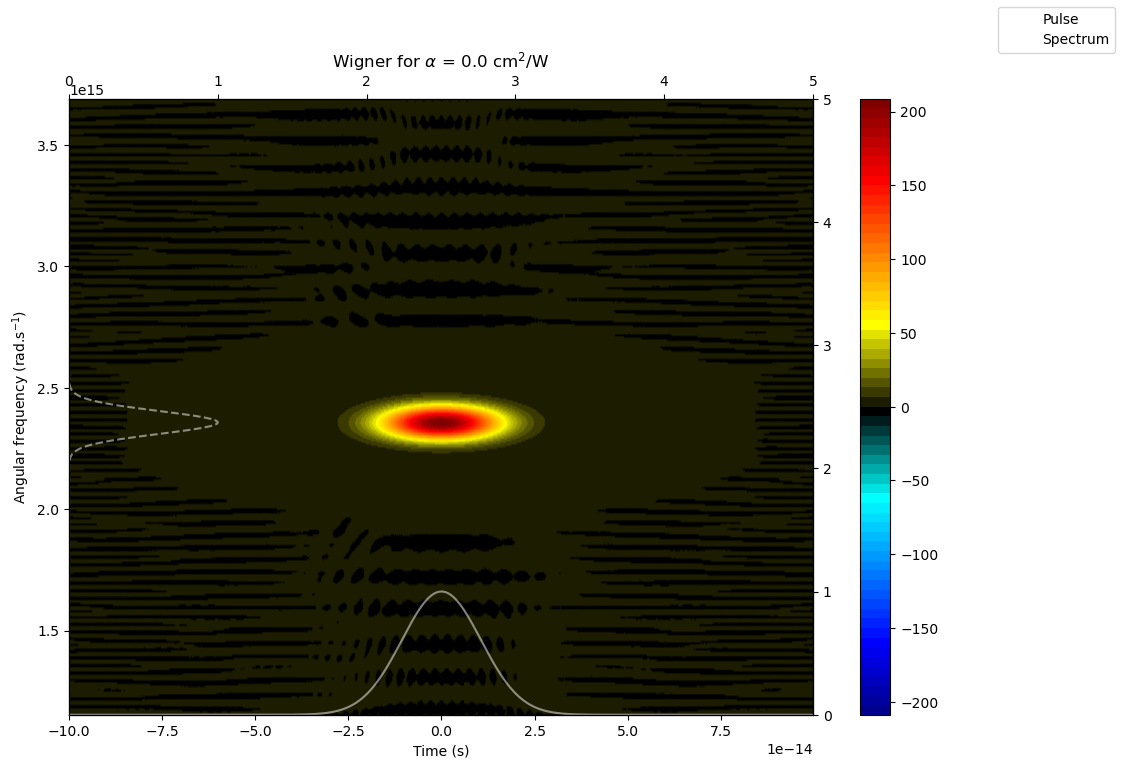

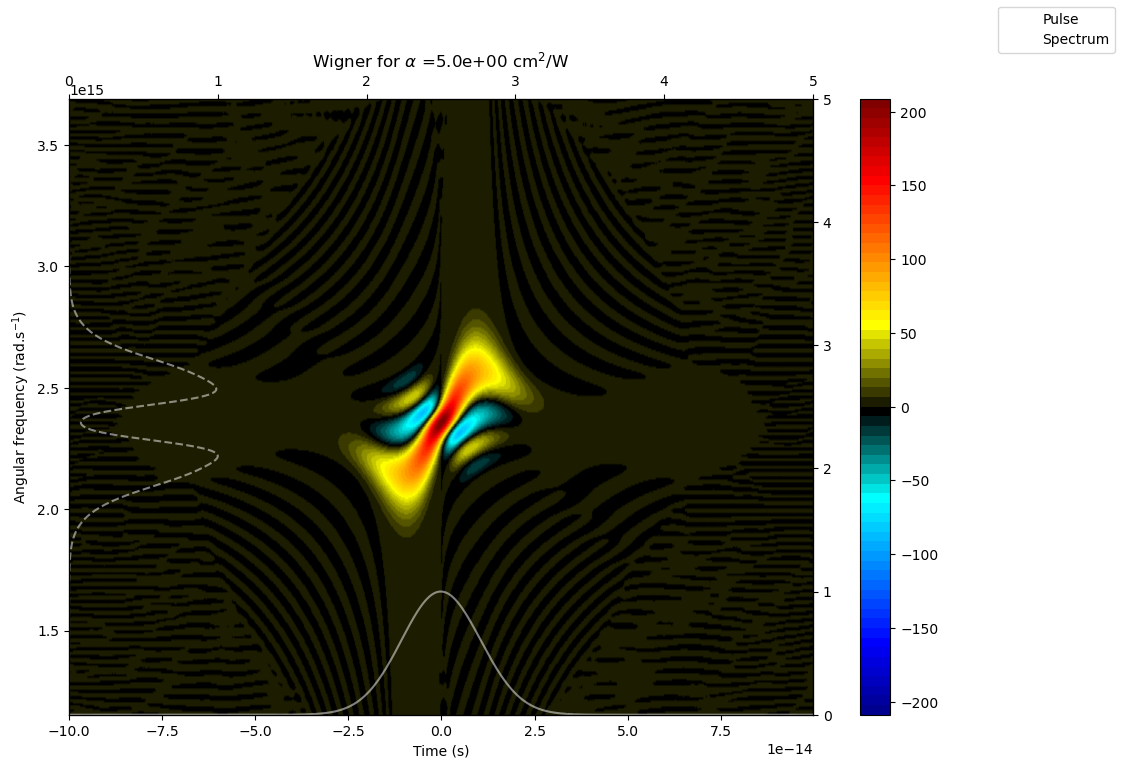

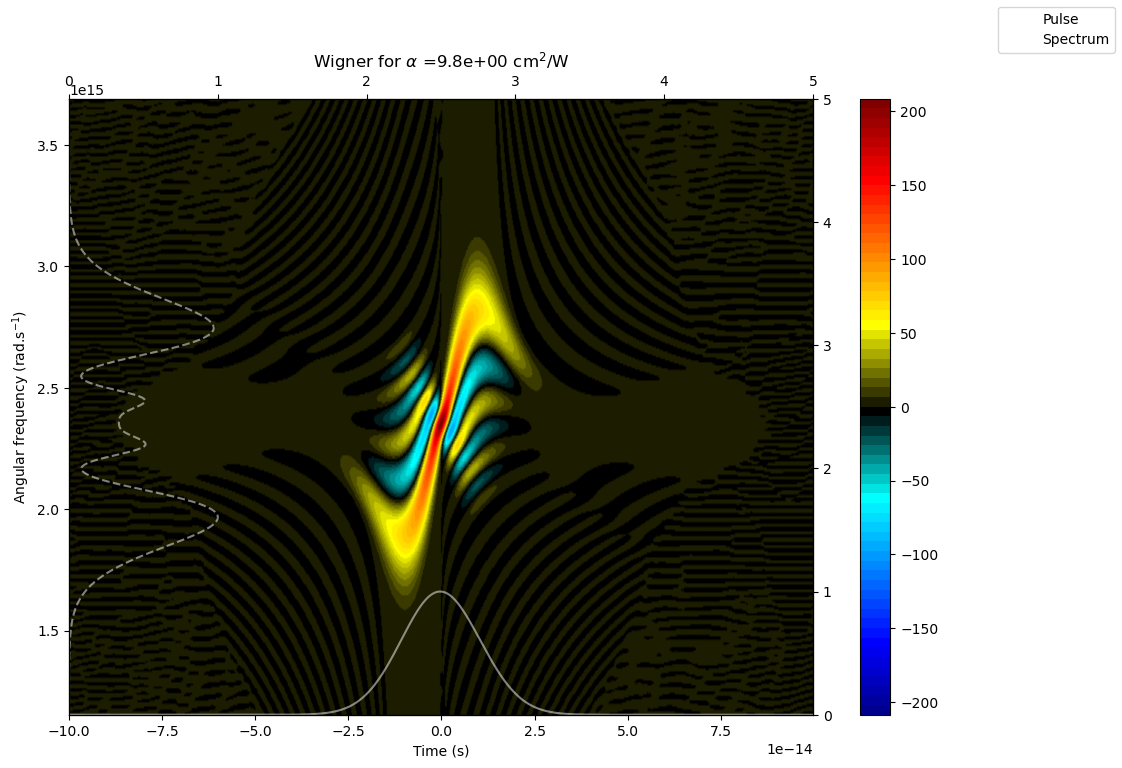

In [209]:
#Setting the limit for plotting
tmin=-100e-15
tmax=100e-15
wmin=1.15e15
wmax=3.7e15

# Parameters for the studytreacy compressortreacy compressor
delta_sigma=0.20
NbSteps=50

SIGMA_25fs,E_t_25fs_out=gaussian_phase(t,w,w0,E_t_25fs_FT,delta_sigma,NbSteps,tmin,tmax)

W0=wigner(E_t_25fs_out[:,0],t,w)
plot_wigner(W0,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\sigma$ = {:.1f} cm$^2$/W'.format(SIGMA_25fs[0]))

ind_min=int(NbSteps/2)

Wopt=wigner(E_t_25fs_out[:,ind_min],t,w)
plot_wigner(Wopt,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\sigma$ ={:.1e} cm$^2$/W'.format(SIGMA_25fs[ind_min]))
            
Wfin=wigner(E_t_25fs_out[:,-1],t,w)
plot_wigner(Wfin,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\sigma$ ={:.1e} cm$^2$/W'.format(SIGMA_25fs[-1]))

<div class="alert alert-block alert-info">
Change the value of <code>delta_sigma</code> to study the influence of the Gaussian temporal phase on the pulse.
</div>

### 5.2 Compensation of self-phase modulation by a quadratic phase

#### 5.2.1 Function to describe SPM compensation

The SPM induces a spectral broadening of the pulses, but does not affect the temporal intensity. The spectrum obtained after SPM being broader, it can support shorter pulses (shorter Fourier limit). Shortening the pulses require compensating the phase introduced by the SPM process. Here we introduce a function which adds a quadratic spectral phase to the self-phase-modulated pulses.

In [211]:
def SPM_compensation(t,w,w0,E_w_spm,E_t_ft,delta_alpha,NbSteps,tmin,tmax,plot1D=False):
    Nbw=len(w)
    Nbt=len(t)
    ALPHA=zeros(NbSteps)
    E_t_out=zeros((len(t),NbSteps),dtype=complex)
    RMS=zeros(NbSteps)
    E_t_spm=FT(E_w_spm,Nbt)
    
    for step in range(NbSteps):
        alpha=-float(step*delta_alpha)
        
        # Pulse before compression
        #Adding a quadratic phase - compressor setting
        E_w_out=E_w_spm*exp(1j*alpha*(w-w0)**2)
        E_w_ft=IFT(E_t_ft,Nbw)
        
        
        E_t_out[:,step]=FT(E_w_out,Nbt)
        E_t_out[:,step]=E_t_out[:,step]/amax(abs(E_t_out[:,step])**2)
        ALPHA[step]=alpha
        RMS[step]=calcRMS(t, abs(E_t_out[:,step])**2)
         #temporal phase of input pulse
        phi_t_out=unwrap(angle(E_t_out[:,step])) 
        phi_t_out=phi_t_out-polyval(polyfit(t[2060:3060],phi_t_out[2060:3060],1),t)
        
        if plot1D==True:
            figure()
            ax1=subplot(2,1,1)
            ax1.plot(t,abs(E_t_out[:,step])**2.0/max(abs(E_t_out[:,step])**2.0),label='Output pulse')
            ax1.plot(t,abs(E_t_spm)**2.0/max(abs(E_t_spm)**2.0),'r',label='Input pulse')
            ax1.fill_between(t, 0,abs(E_t_ft)**2/max(abs(E_t_ft)**2) ,alpha=0.3,label='FT limited')
            #ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
            ax1.text(0.8*tmin,0.4,"$\\alpha$ ={:2.1f} ".format(alpha*1e30))
            ax1.set_xlim([tmin,tmax])
            ax11 = ax1.twinx()
            ax11.plot(t,phi_t_out,'--r')
            #ax11.plot(t,phi_t_in,'--r')
            ax11.set_ylim([0,10])
            ax1.legend()
            title('Compression of SPM')
        
            ax1=subplot(2,1,2)
            ax1.plot(w,abs(E_w_out)**2.0/max(abs(E_w_out)**2.0),label='Output pulse')
            ax1.plot(w,abs(E_w_spm)**2.0/max(abs(E_w_spm)**2.0),'r',label='Input pulse')
            ax1.fill_between(w, 0,abs(E_w_ft)**2/max(abs(E_w_ft)**2) ,alpha=0.3,label='FT limited')
            #ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
            ax1.set_xlim([wmin,wmax])
            """
            ax11 = ax1.twinx()
            ax11.plot(t,phi_t_out,'--r')
            #ax11.plot(t,phi_t_in,'--r')
            ax11.set_ylim([-10,10])
            """
            ax1.legend()
    return RMS,ALPHA,E_t_out
 

#### 5.2.2 Initial pulse

Text(0.5, 1.0, 'Spectrum with SPM')

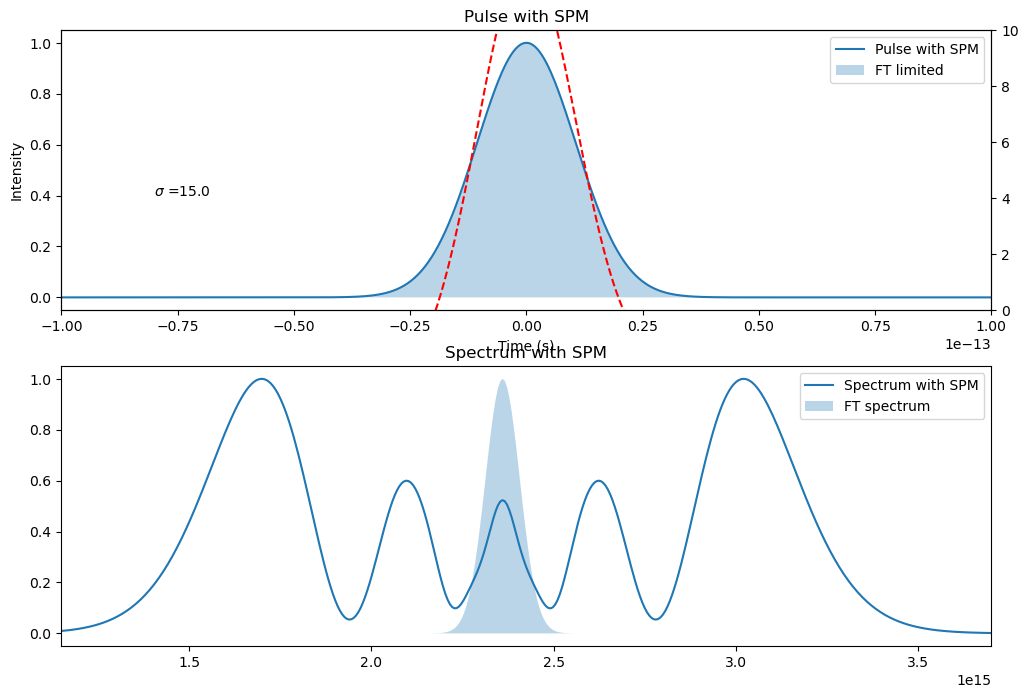

In [212]:
# 25 fs pulse @ 800nm
# pulse central wavelength
lambda0=800e-9 #nm
#pulse central angular frequency
w0=2*pi*3e8/lambda0 
#duration in fs
duration=25e-15 

I_t_25fs=calc_I_t(t,duration)


tmin=-100e-15
tmax=100e-15
wmin=1.15e15
wmax=3.7e15

sigma0=15.0
# Field at z=0
E_t_25fs_FT=sqrt(I_t_25fs)*exp(-1j*w0*t)
E_w_25fs_FT=IFT(E_t_25fs_FT,Nbw)

E_t_25fs_spm=E_t_25fs_FT*exp(1j*sigma0*I_t_25fs)
E_w_25fs_spm=IFT(E_t_25fs_spm,Nbw)

phi_t_spm=unwrap(angle(E_t_25fs_spm)) 
phi_t_spm=phi_t_spm-polyval(polyfit(t[2060:3060],phi_t_spm[2060:3060],1),t)


figure()
ax1=subplot(2,1,1)
ax1.plot(t,abs(E_t_25fs_spm)**2.0/max(abs(E_t_25fs_spm)**2.0),label='Pulse with SPM')
ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
#ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
ax1.text(0.8*tmin,0.4,"$\\sigma$ ={:2.1f}".format(sigma0))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Intensity')
ax1.set_xlim([tmin,tmax])
ax11 = ax1.twinx()
#ax11.plot(t,phi_t_out,'--b')
ax11.plot(t,phi_t_spm,'--r')
ax11.set_ylim([0,10])
ax1.legend()
title('Pulse with SPM')

ax1=subplot(2,1,2)
ax1.plot(w,abs(E_w_25fs_spm)**2.0/max(abs(E_w_25fs_spm)**2.0),label='Spectrum with SPM')
ax1.fill_between(w, 0,abs(E_w_25fs_FT)**2/max(abs(E_w_25fs_FT)**2) ,alpha=0.3,label='FT spectrum')
#ax1.fill_between(t, 0,abs(E_t_25fs_FT)**2/max(abs(E_t_25fs_FT)**2) ,alpha=0.3,label='FT limited')
#ax1.text(0.8*wmin,0.4,"$\\sigma$ ={:2.1f} cm$^2$/W".format(sigma))
ax1.set_xlim([wmin,wmax])
#ax11 = ax1.twinx()
#ax11.plot(t,phi_t_out,'--b')
#ax11.plot(t,phi_w_spm,'--r')
#ax11.set_ylim([0,10])
ax1.legend()
title('Spectrum with SPM')

#### 5.2.3 Compensation of SPM by introducing a quadratic spectral phase

0

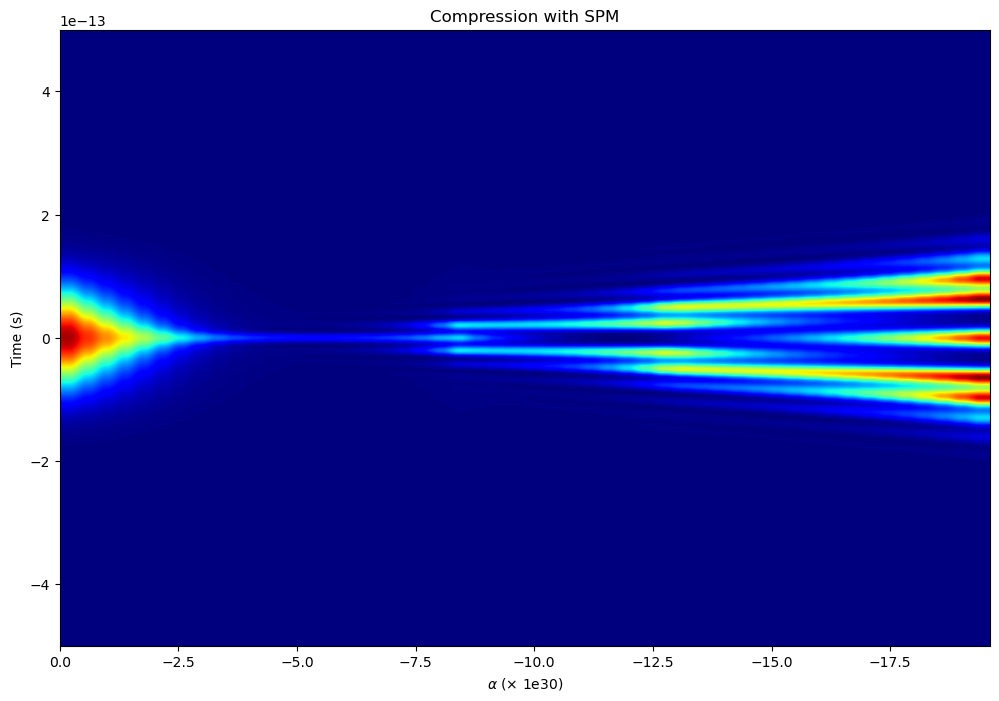

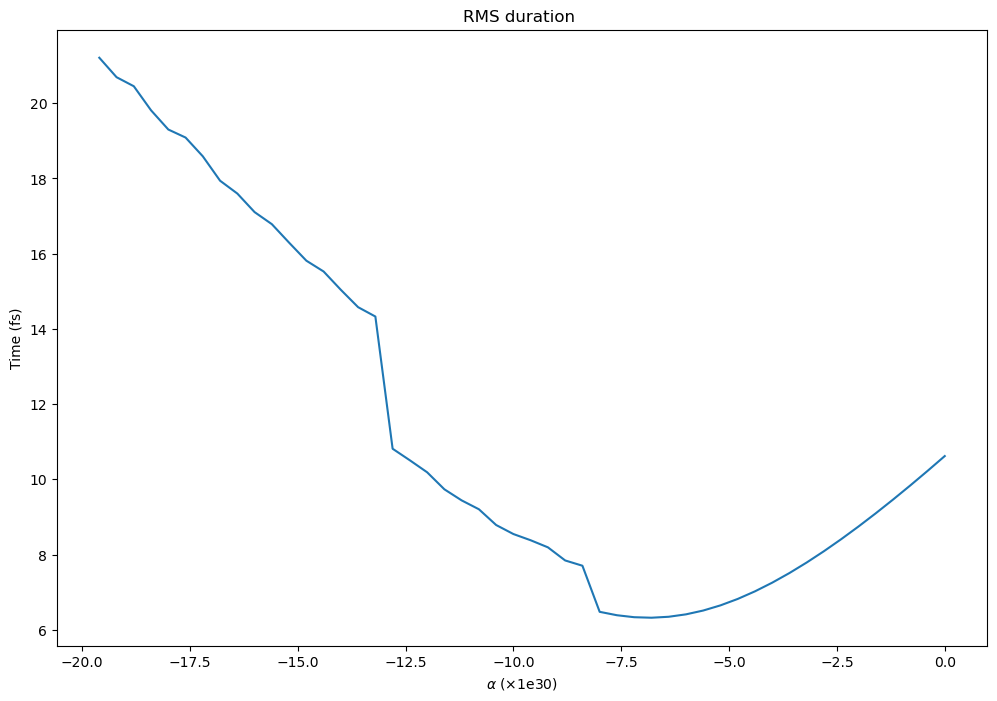

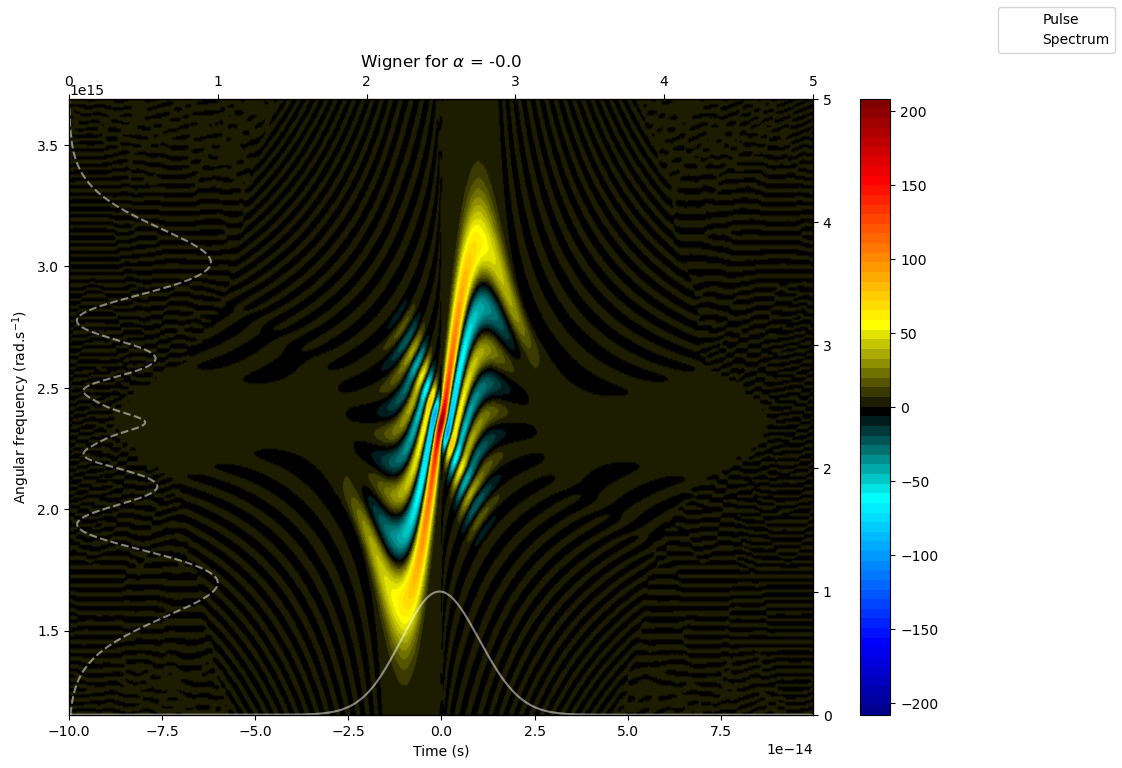

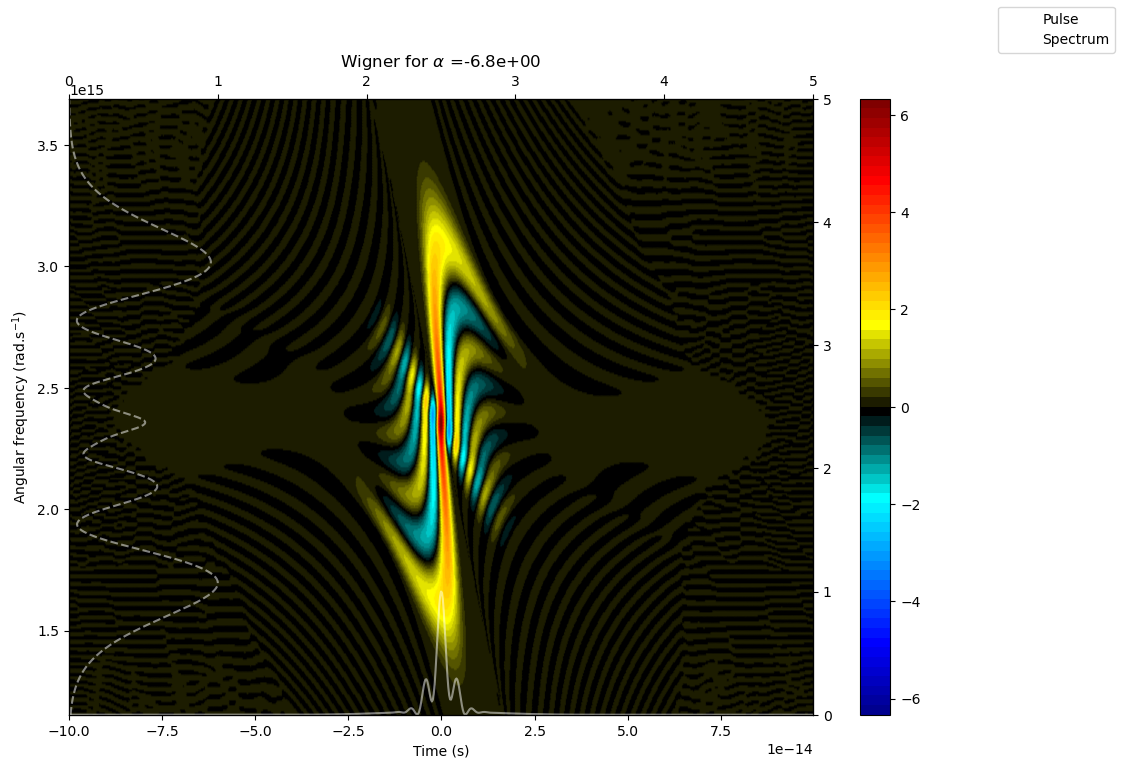

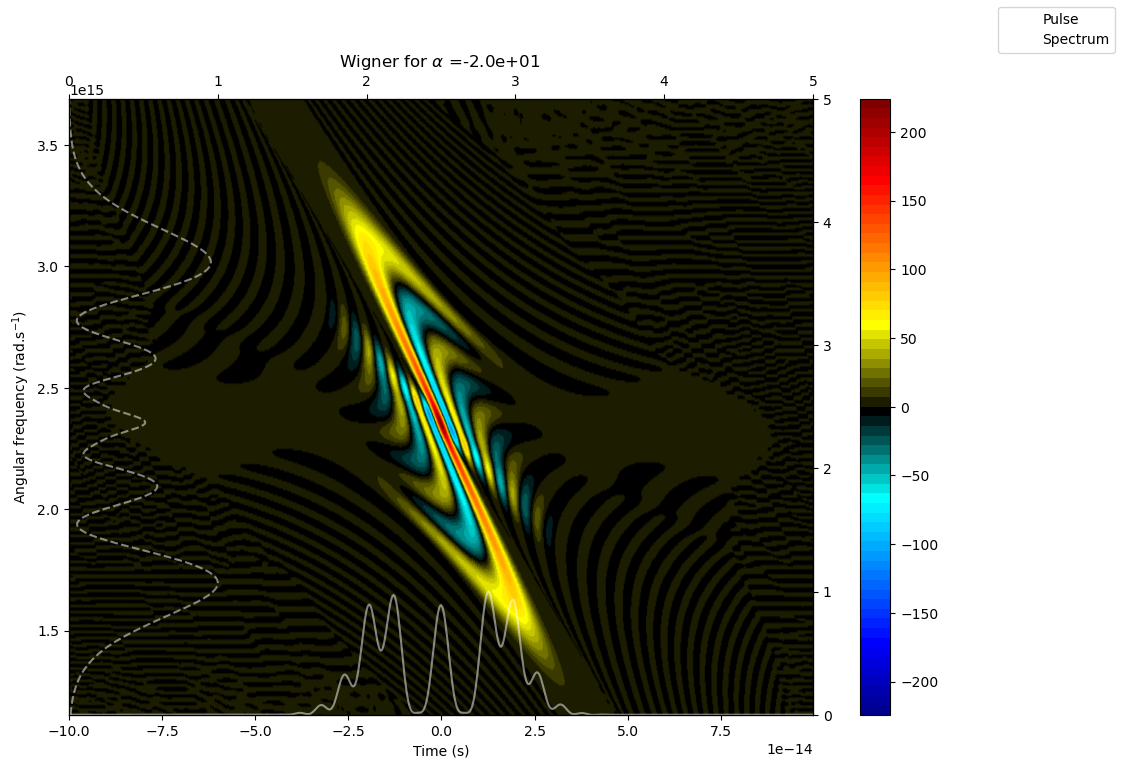

In [214]:

delta_alpha=0.4*(1e-15)**2
NbSteps=50

RMS,ALPHA,E_t_compressed=SPM_compensation(t,w,w0,E_w_25fs_spm,E_t_25fs_FT,delta_alpha,NbSteps,tmin,tmax)

figure()
ind_tmin=abs(t-tmin).argmin()
ind_tmax=abs(t-tmax).argmin()
I=abs(E_t_compressed[ind_tmin:ind_tmax,:])**2.0

imshow(I,origin='lower',extent=(max(ALPHA)*1e30,min(ALPHA)*1e30,min(t),max(t)),cmap='jet')
xlabel('$\\alpha$ ($\\times$ 1e30)')
ylabel('Time (s)')
title('Compression with SPM')
axis('auto')


figure()
plot(ALPHA*1e30,RMS*1e15)
title('RMS duration ')
xlabel('$\\alpha$ ($\\times$1e30)')
ylabel('Time (fs)')
#%%
W0=wigner(E_t_compressed[:,0],t,w)
plot_wigner(W0,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ = {:.1f}'.format(ALPHA[0]*1e30))

ind_min=argmin(RMS)

Wopt=wigner(E_t_compressed[:,ind_min],t,w)
plot_wigner(Wopt,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ ={:.1e} '.format(ALPHA[ind_min]*1e30))

Wfin=wigner(E_t_compressed[:,-1],t,w)
plot_wigner(Wfin,t,w,tmin,tmax,wmin,wmax,'Wigner for $\\alpha$ ={:.1e} '.format(ALPHA[-1]*1e30))